Generated stock with Sharpe: 1.90, Annual return: 37.84%
Generated stock with Sharpe: 1.21, Annual return: 20.53%
Generated stock with Sharpe: 0.89, Annual return: 17.35%
Generated stock with Sharpe: 0.86, Annual return: 16.38%
Generated stock with Sharpe: 2.21, Annual return: 34.87%
Generated stock with Sharpe: 1.41, Annual return: 21.68%
Generated stock with Sharpe: 1.34, Annual return: 17.27%
Generated stock with Sharpe: 0.85, Annual return: 16.71%
Generated stock with Sharpe: 1.15, Annual return: 21.01%
Generated stock with Sharpe: 1.72, Annual return: 27.48%
Generated 10 stock datasets

Stock 1:
Date range: 2010-12-21 00:00:00 to 2019-08-29 00:00:00
Annualized return: 37.84%
Sharpe ratio: 1.90
Maximum drawdown: -15.04%
Regime-based plot saved to 'synthetic_stock_1_regime.png'

Stock 2:
Date range: 2010-12-21 00:00:00 to 2019-08-29 00:00:00
Annualized return: 20.53%
Sharpe ratio: 1.21
Maximum drawdown: -29.17%
Regime-based plot saved to 'synthetic_stock_2_regime.png'

Stock 3:
Date

/Users/newuser/opt/miniconda3/envs/cs499f22/lib/python3.9/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/newuser/opt/miniconda3/envs/cs499f22/lib/python3.9/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/newuser/opt/miniconda3/envs/cs499f22/lib/python3.9/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/newuser/opt/miniconda3/envs/cs499f22/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/newuser/opt/miniconda3/envs/cs499f22/lib/python3.9/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/newuser/opt/min


Correlation Comparison (Actual vs. Simulated):
stock_0-stock_1: Actual=0.006, Simulated=0.206
stock_0-stock_2: Actual=-0.005, Simulated=-0.101
stock_0-stock_3: Actual=-0.066, Simulated=-0.043
stock_0-stock_4: Actual=0.035, Simulated=0.139
stock_0-stock_5: Actual=0.010, Simulated=-0.089
stock_0-stock_6: Actual=-0.008, Simulated=-0.104
stock_0-stock_7: Actual=0.031, Simulated=-0.092
stock_0-stock_8: Actual=-0.031, Simulated=-0.118
stock_0-stock_9: Actual=0.003, Simulated=-0.066
stock_1-stock_2: Actual=0.005, Simulated=0.079
stock_1-stock_3: Actual=-0.021, Simulated=0.022
stock_1-stock_4: Actual=-0.003, Simulated=-0.020
stock_1-stock_5: Actual=0.003, Simulated=-0.221
stock_1-stock_6: Actual=0.010, Simulated=0.073
stock_1-stock_7: Actual=-0.008, Simulated=0.320
stock_1-stock_8: Actual=0.014, Simulated=0.007
stock_1-stock_9: Actual=-0.035, Simulated=-0.118
stock_2-stock_3: Actual=-0.023, Simulated=-0.037
stock_2-stock_4: Actual=0.010, Simulated=-0.035
stock_2-stock_5: Actual=-0.030, Simula

/var/folders/jf/1lv8wgr503396_w00202kgmw0000gp/T/ipykernel_94504/3667477598.py:769: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Factor-based plot saved to 'synthetic_stock_1_factor.png'
Factor-based plot saved to 'synthetic_stock_2_factor.png'
Factor-based plot saved to 'synthetic_stock_3_factor.png'
Factor-based plot saved to 'synthetic_stock_4_factor.png'
Factor-based plot saved to 'synthetic_stock_5_factor.png'
Factor-based plot saved to 'synthetic_stock_6_factor.png'
Factor-based plot saved to 'synthetic_stock_7_factor.png'
Factor-based plot saved to 'synthetic_stock_8_factor.png'
Factor-based plot saved to 'synthetic_stock_9_factor.png'


/var/folders/jf/1lv8wgr503396_w00202kgmw0000gp/T/ipykernel_94504/3667477598.py:685: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 10))


Factor-based plot saved to 'synthetic_stock_10_factor.png'


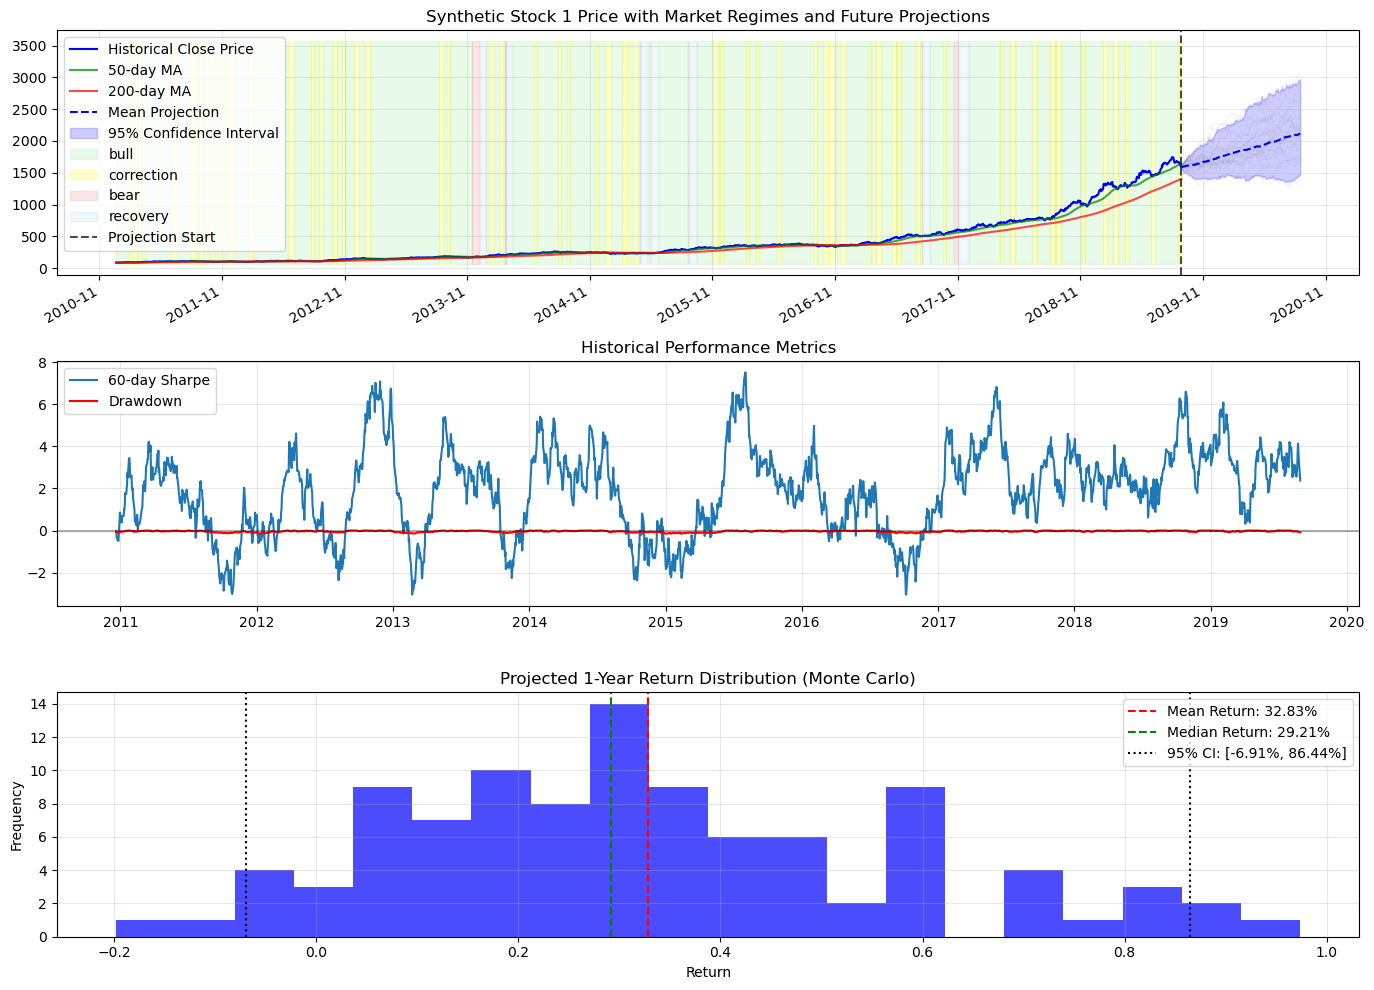

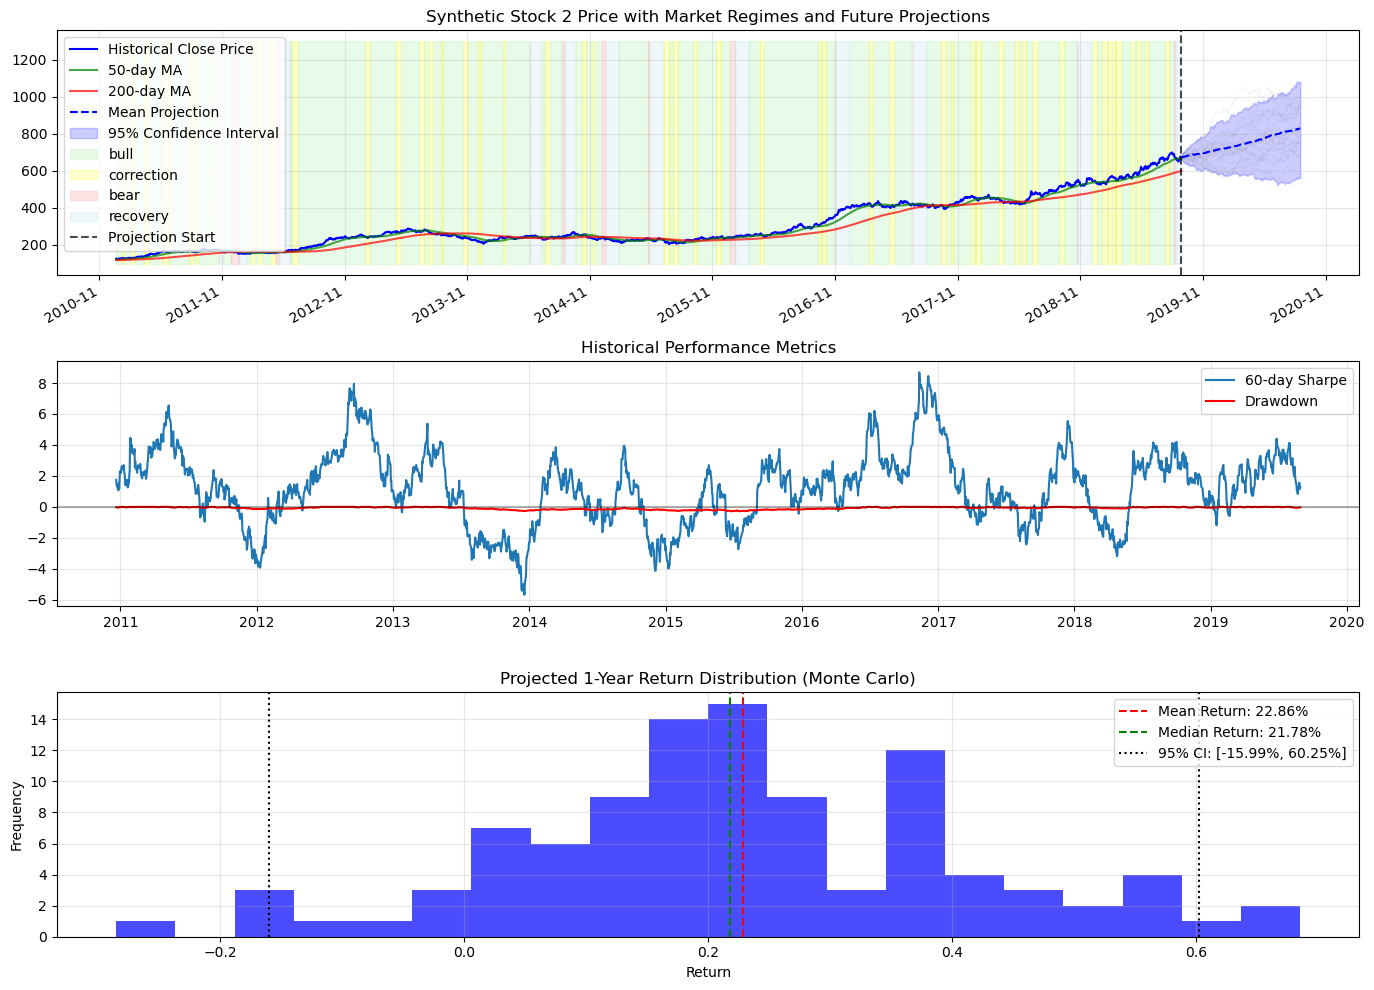

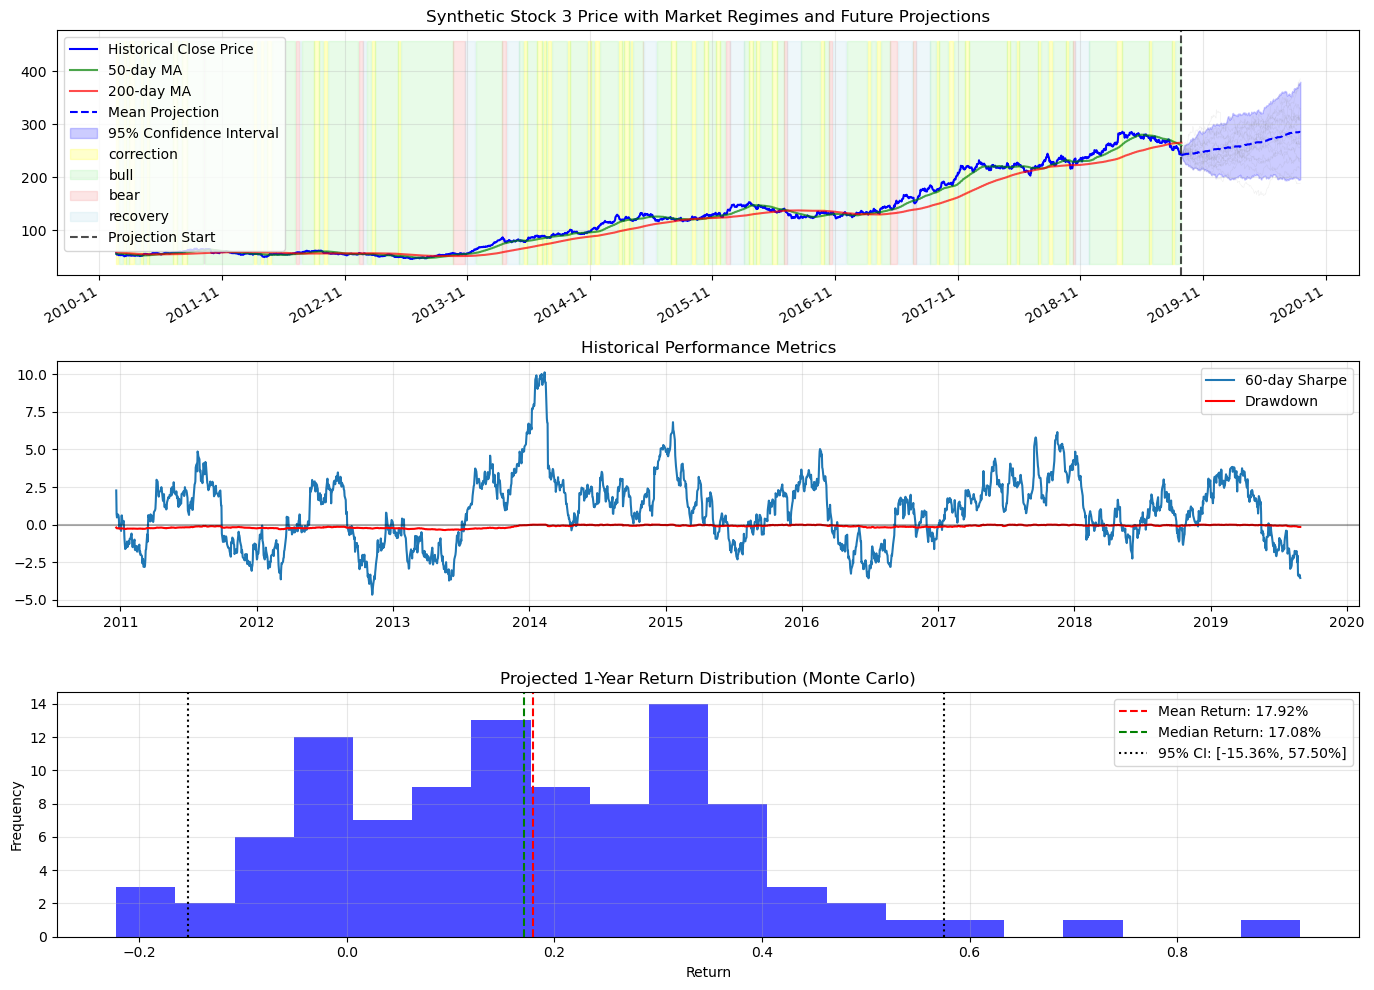

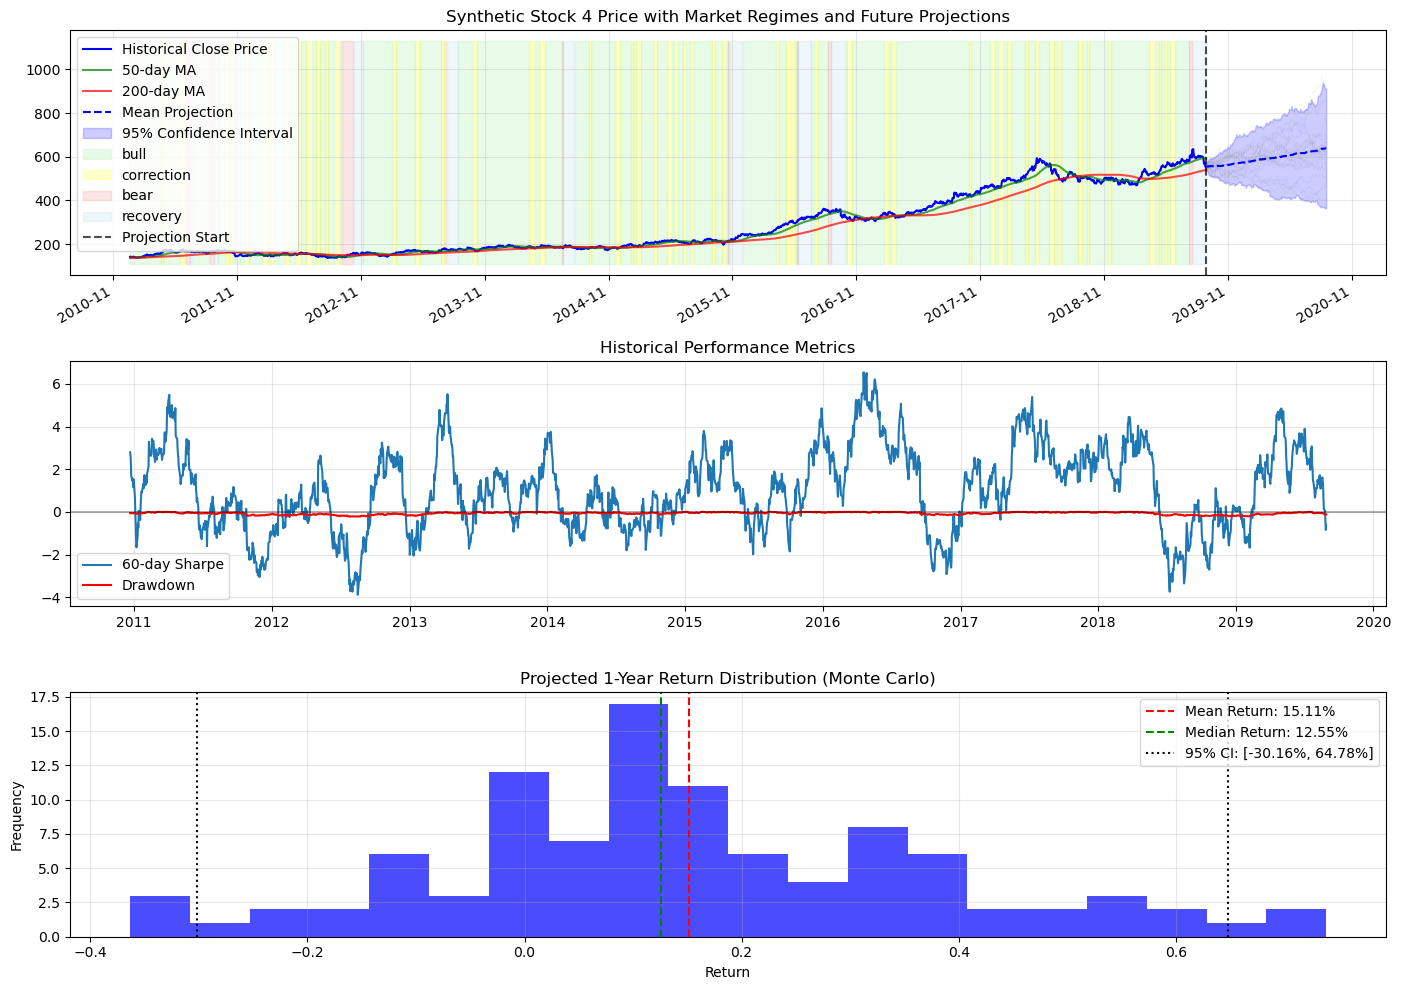

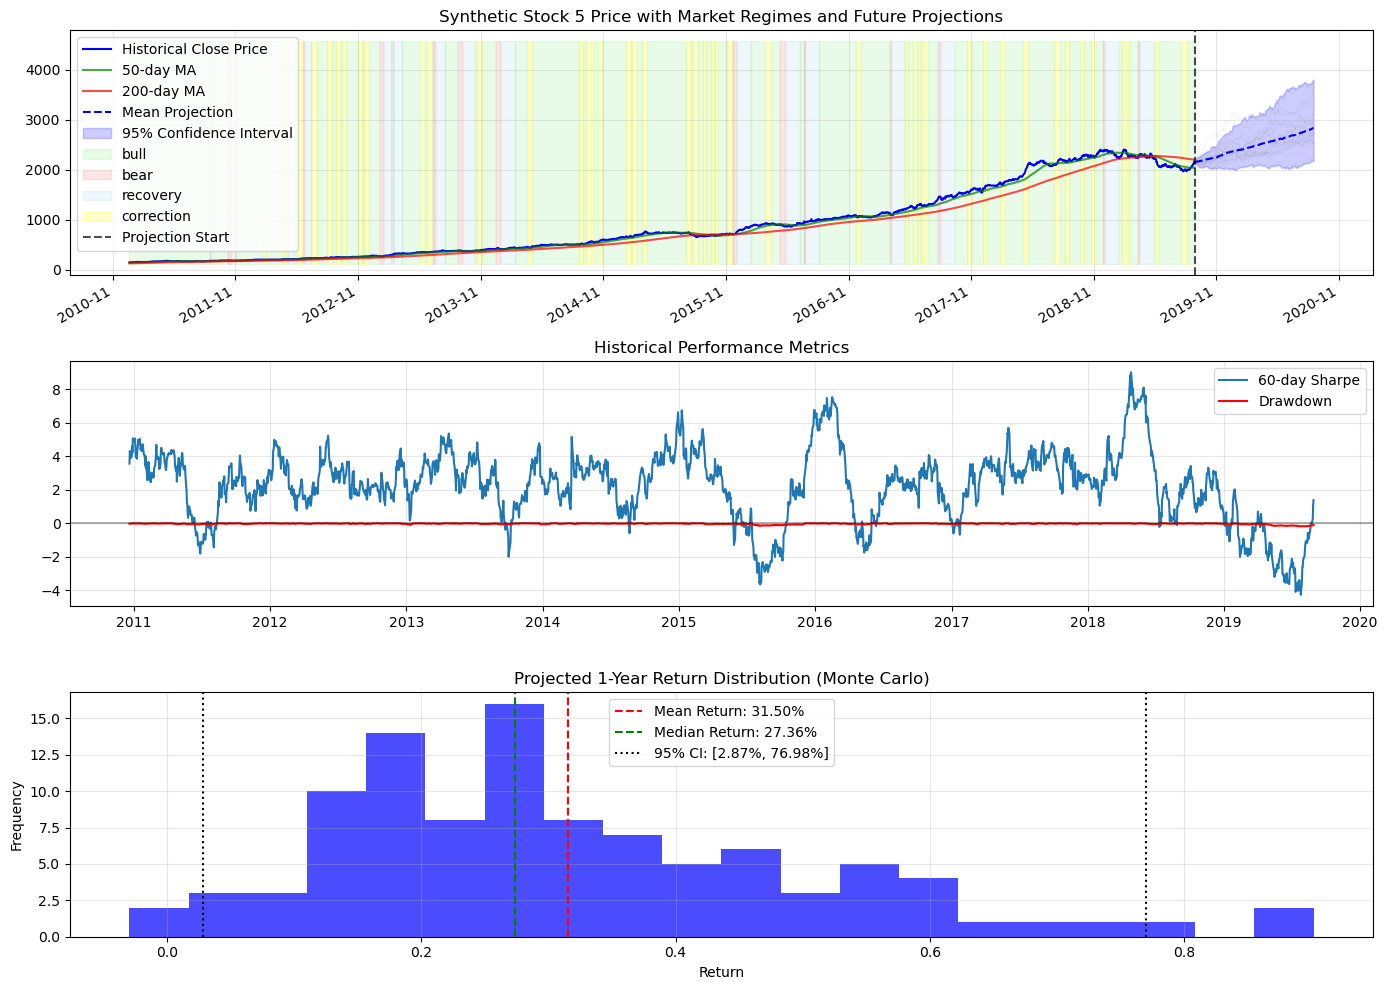

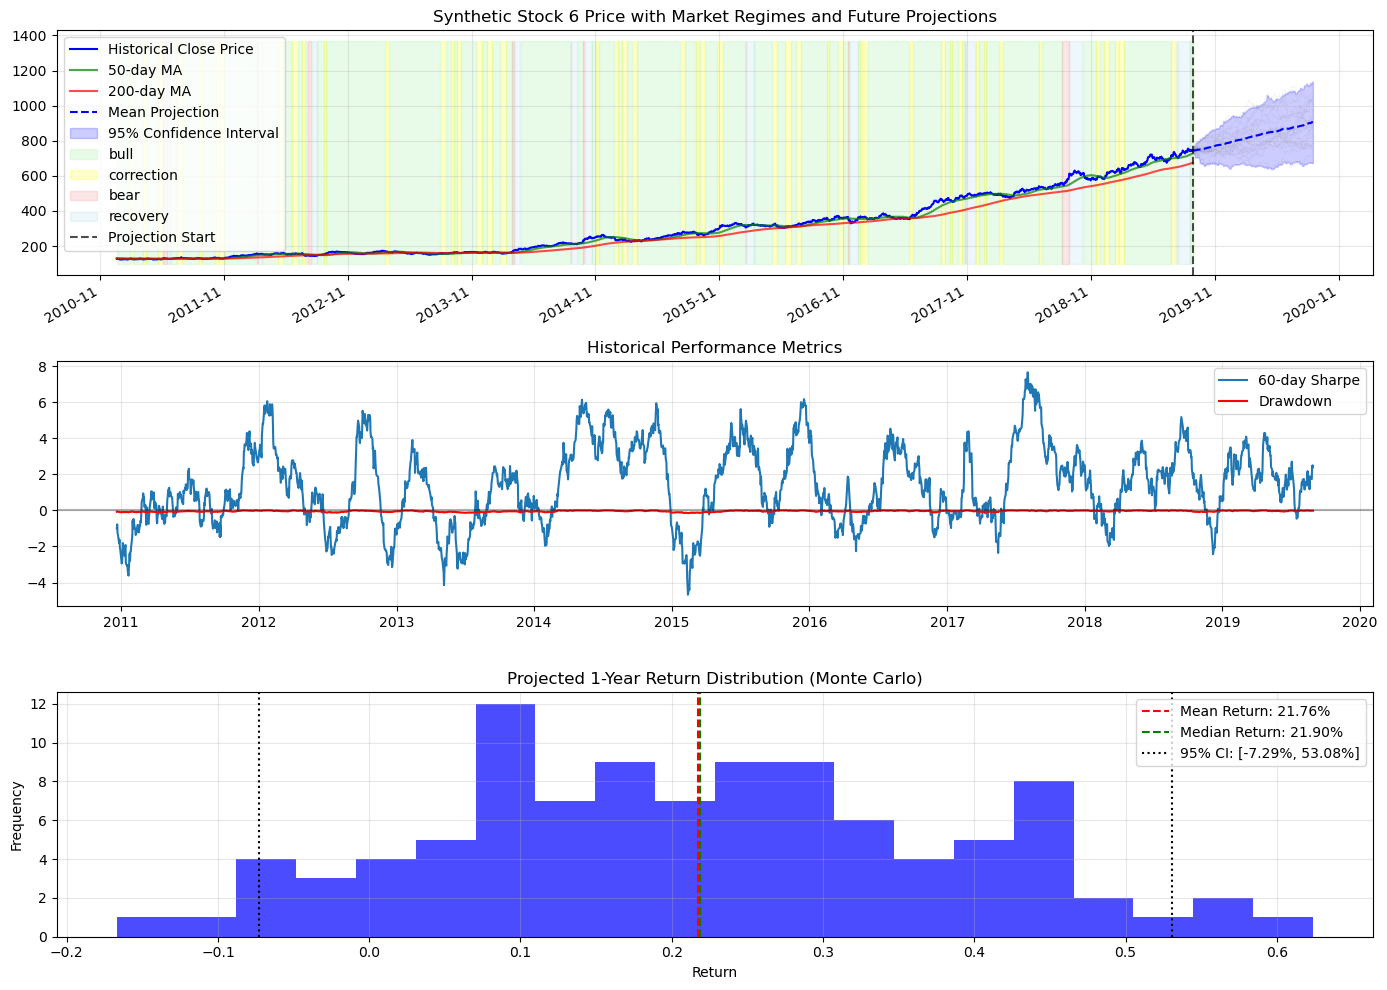

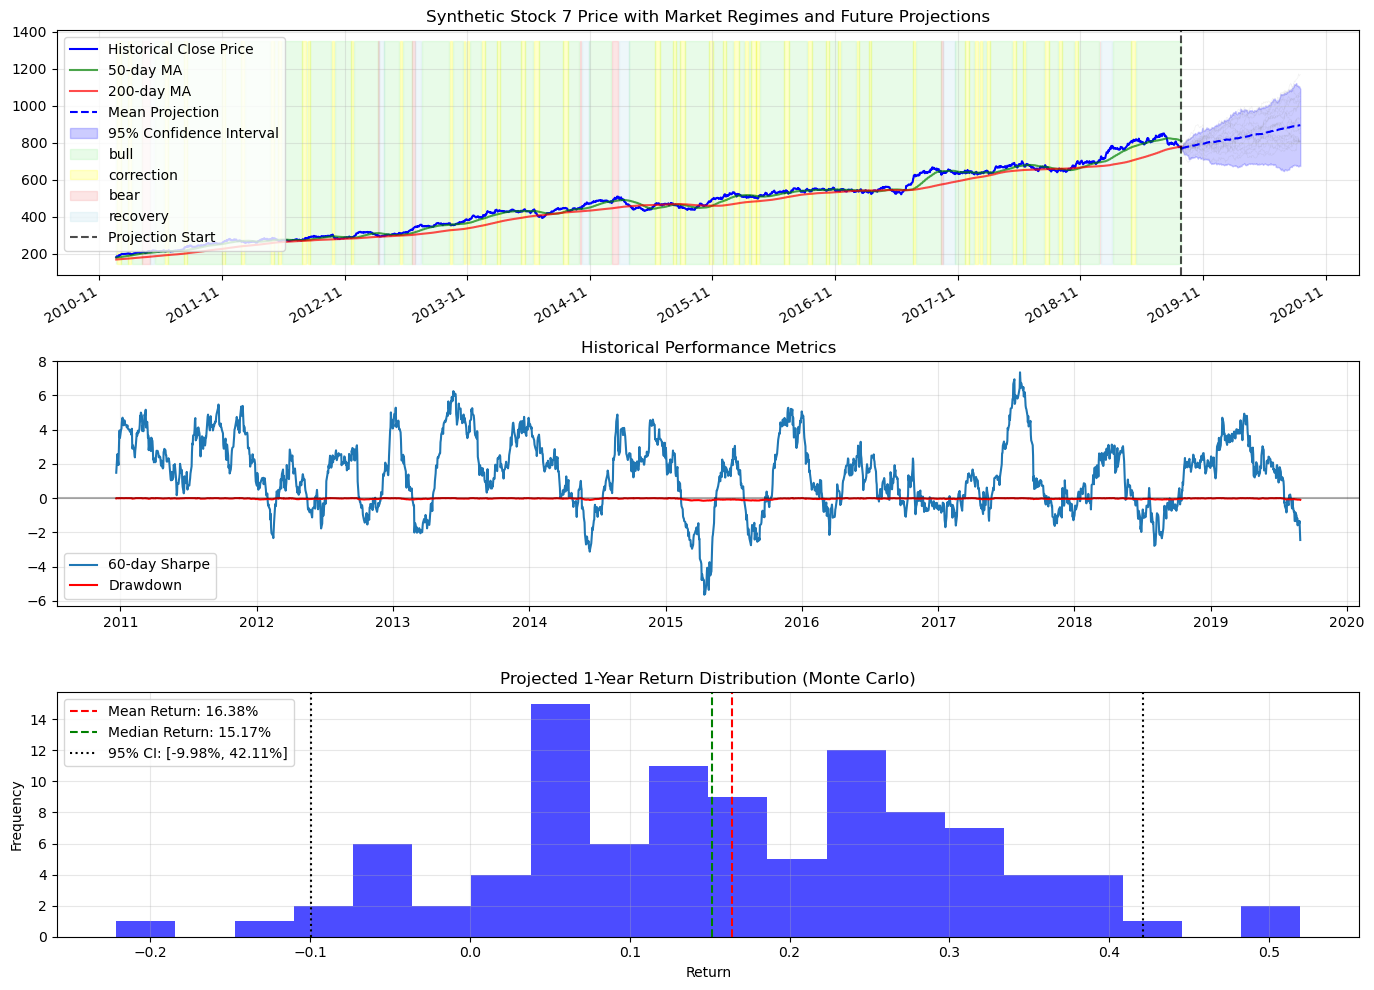

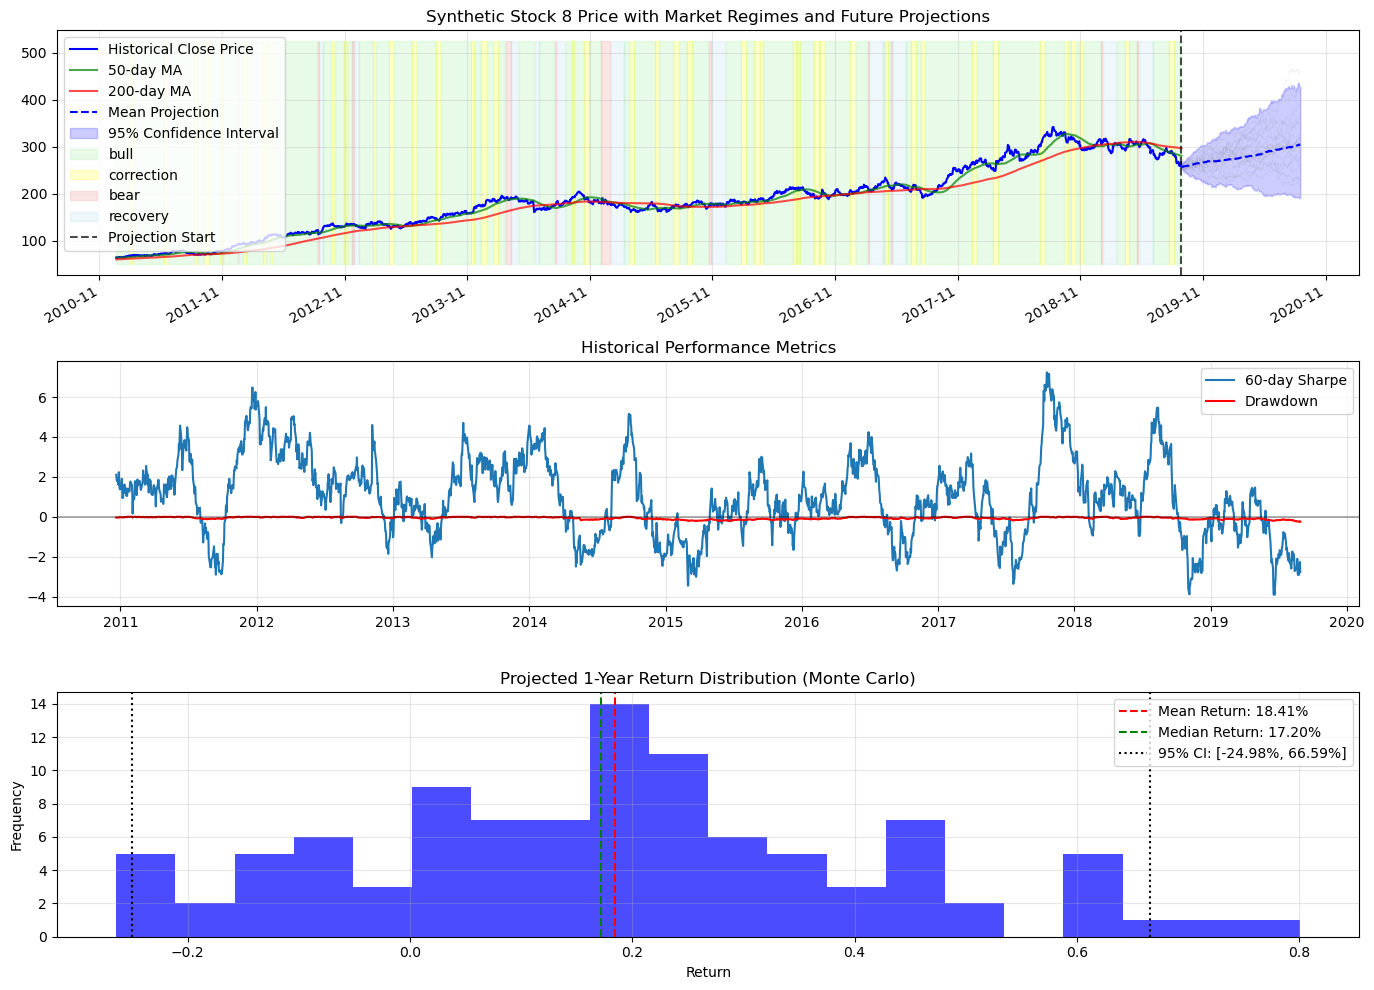

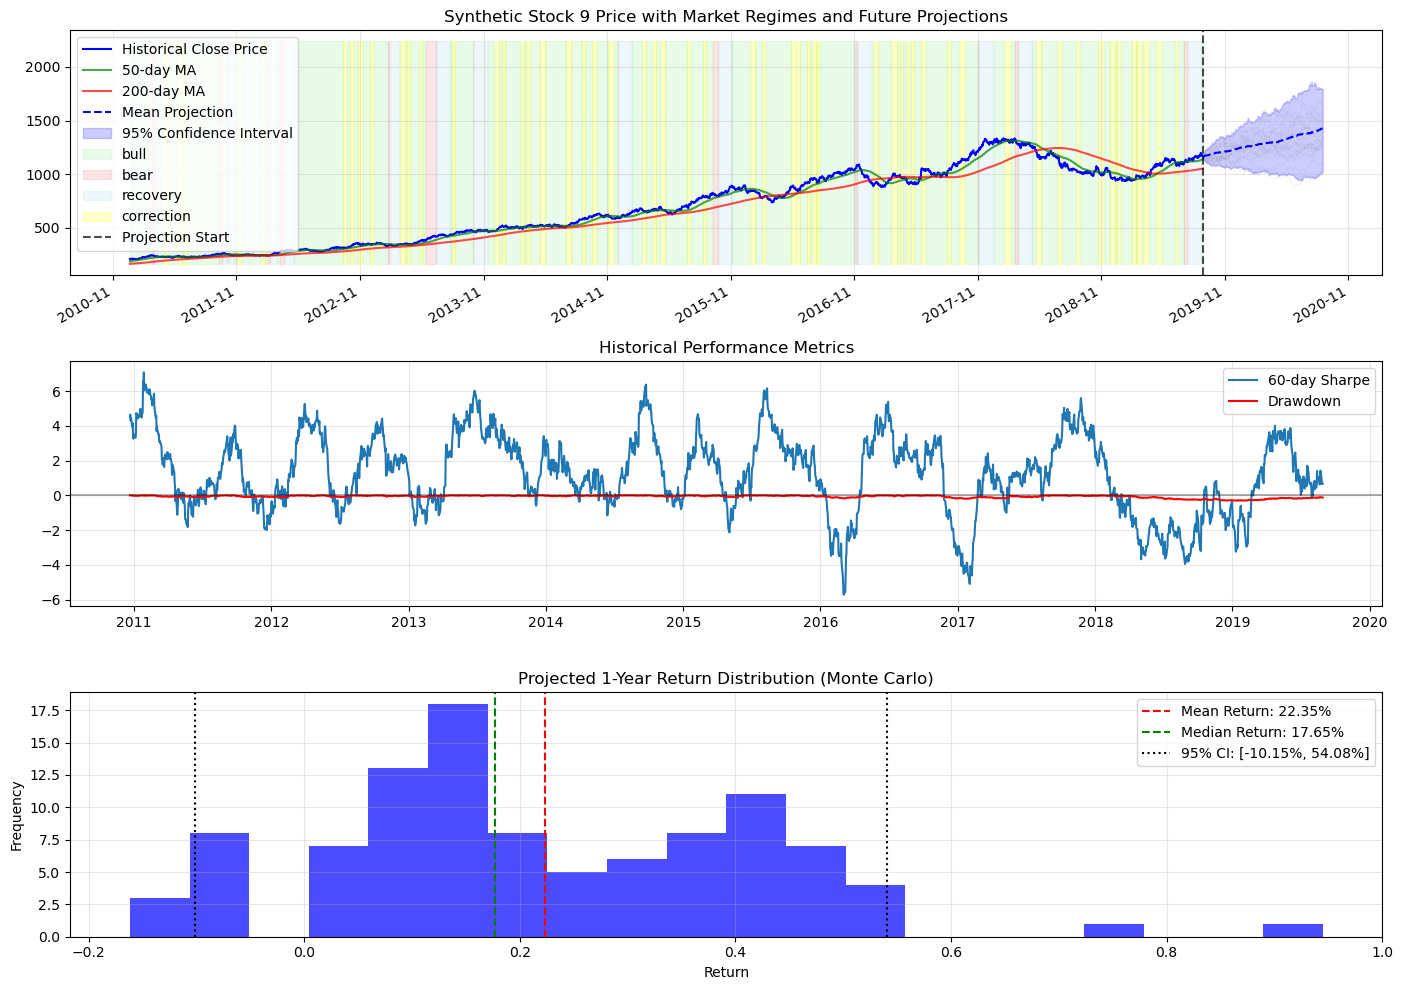

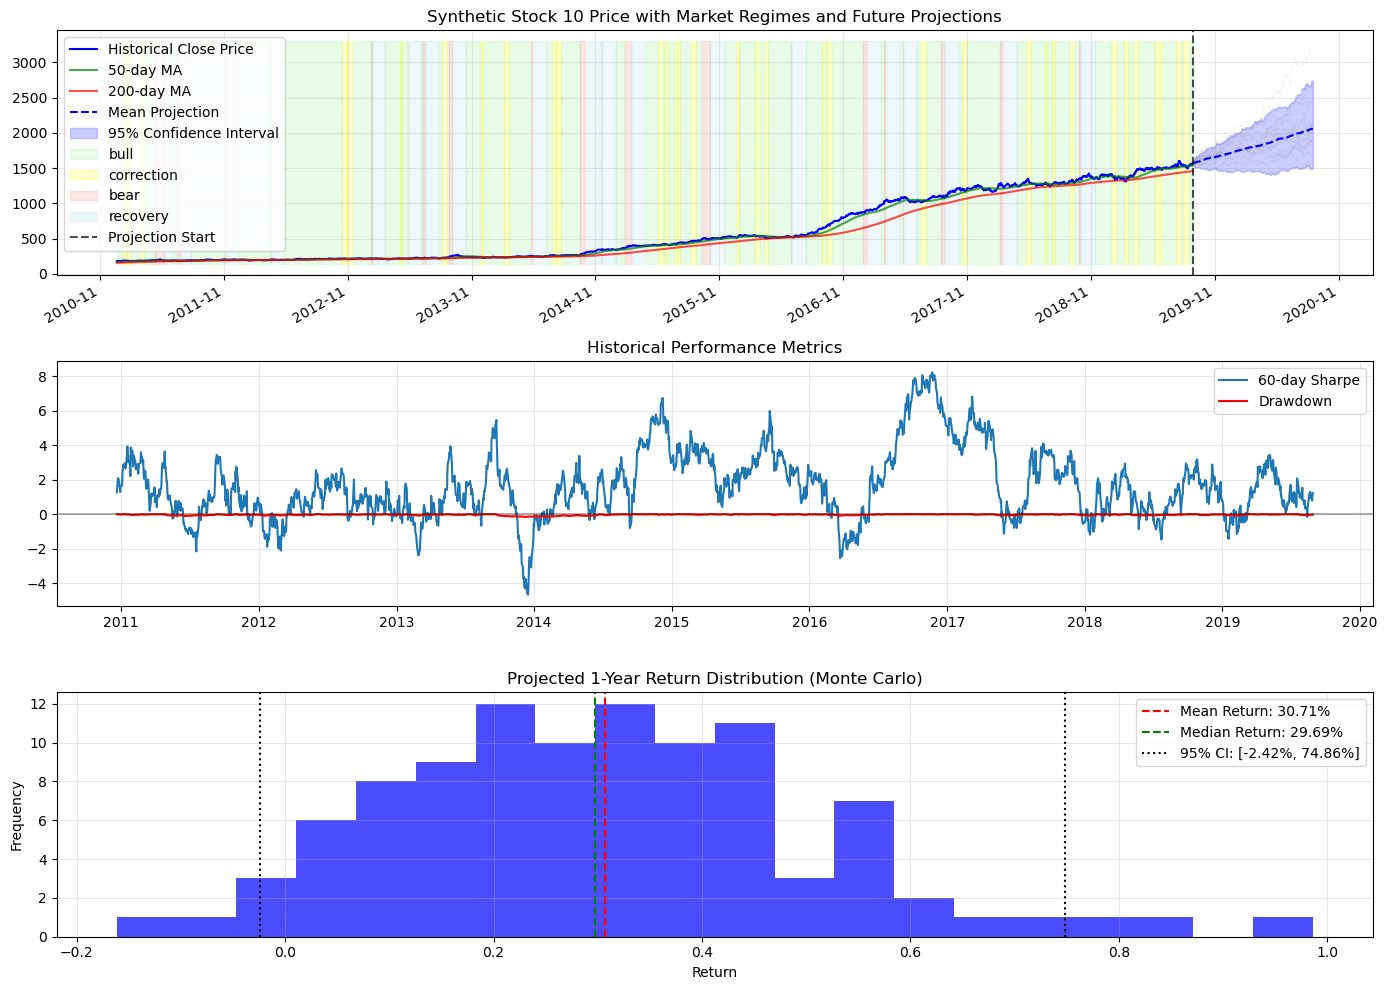

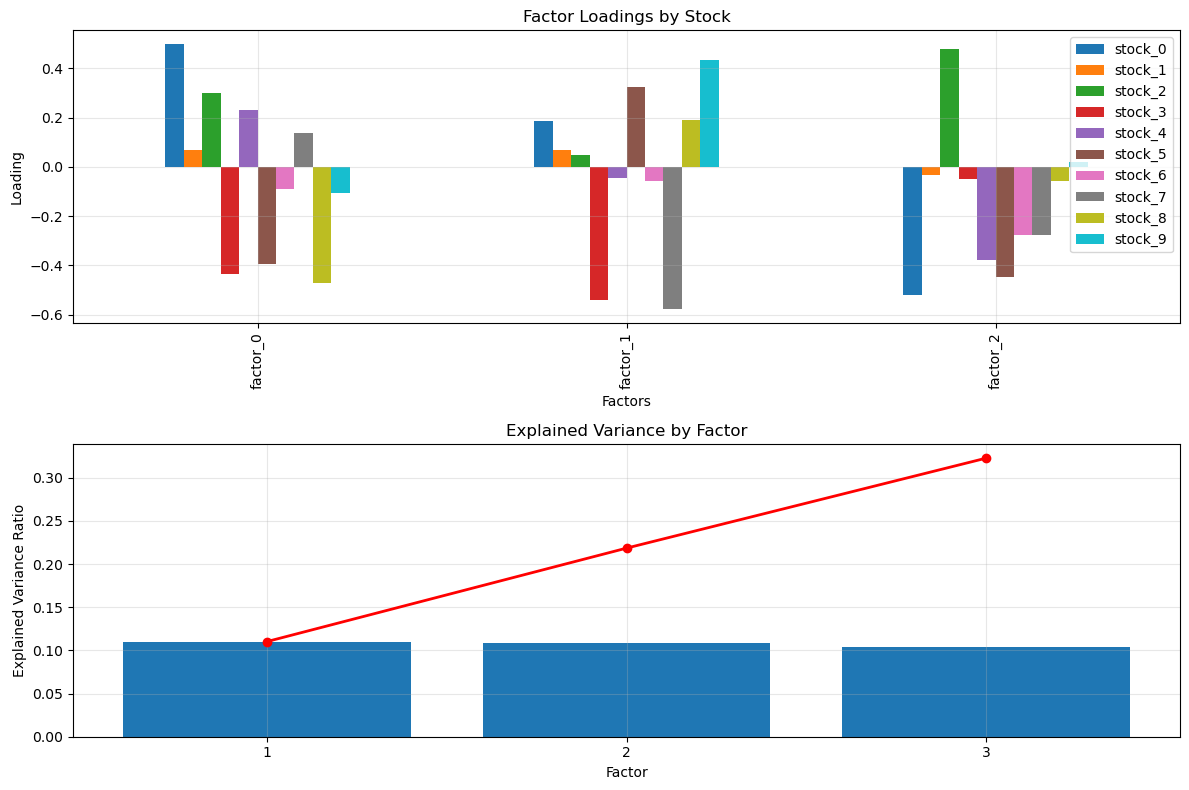

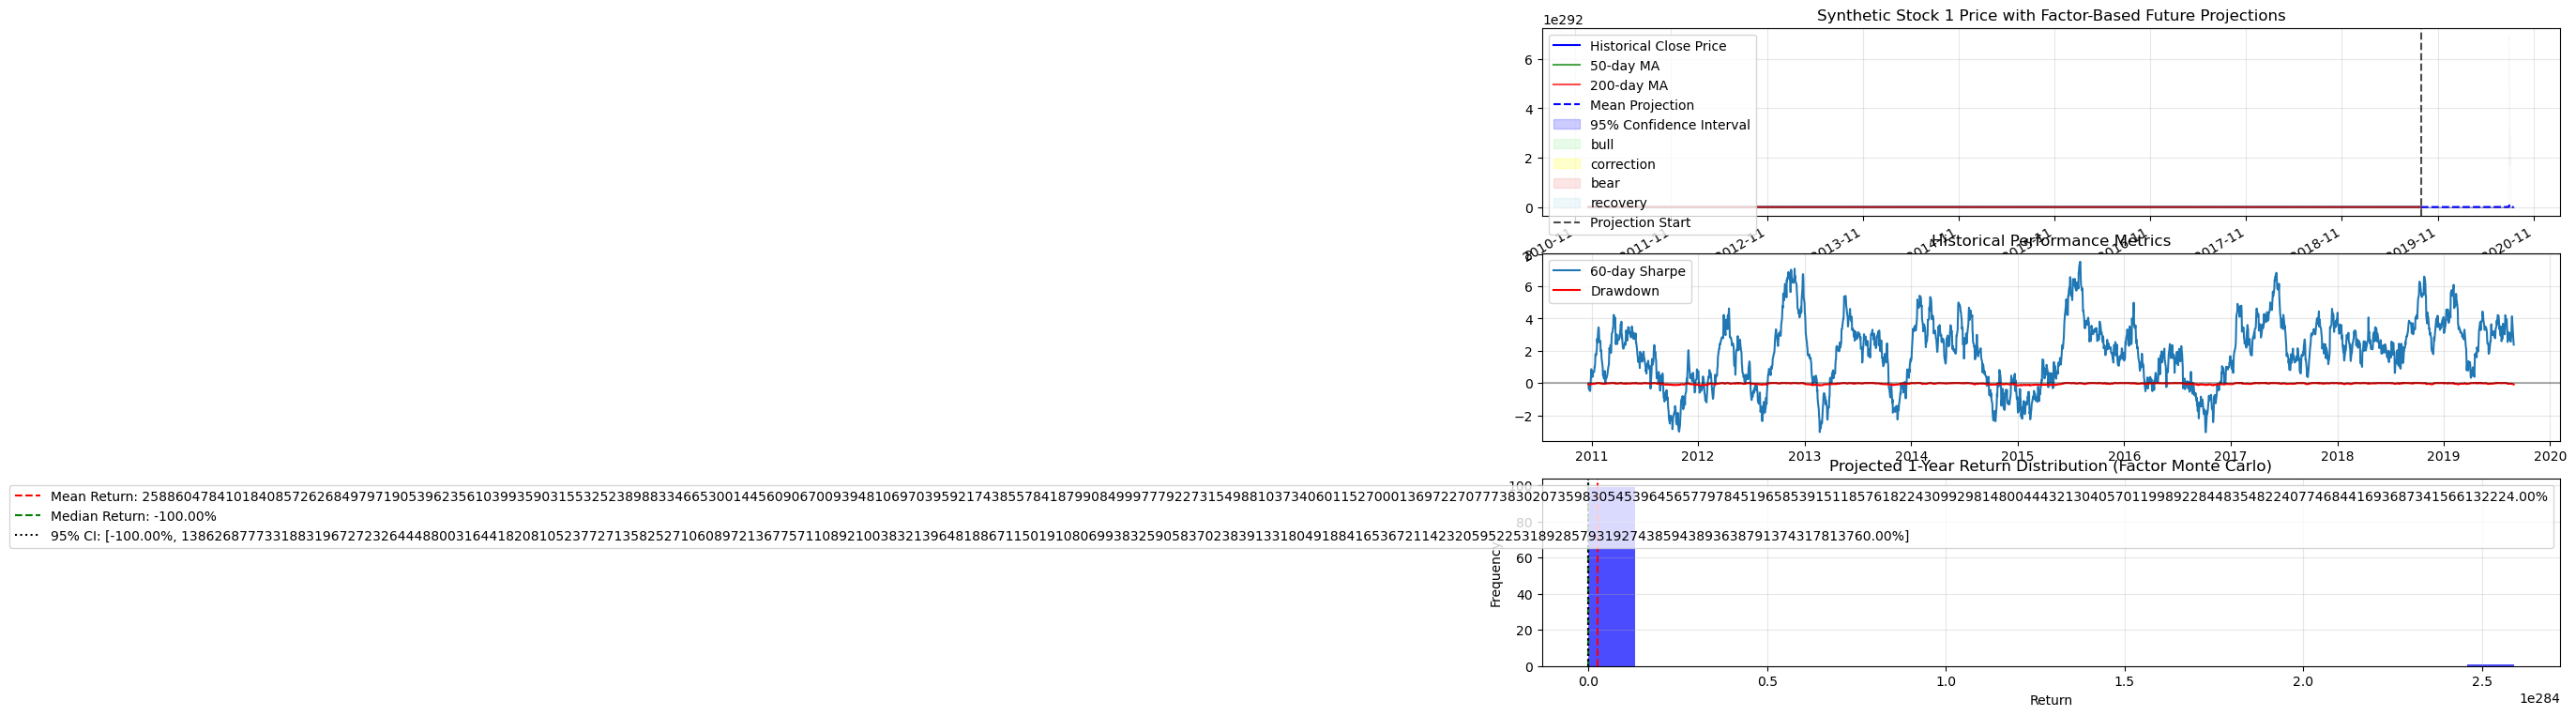

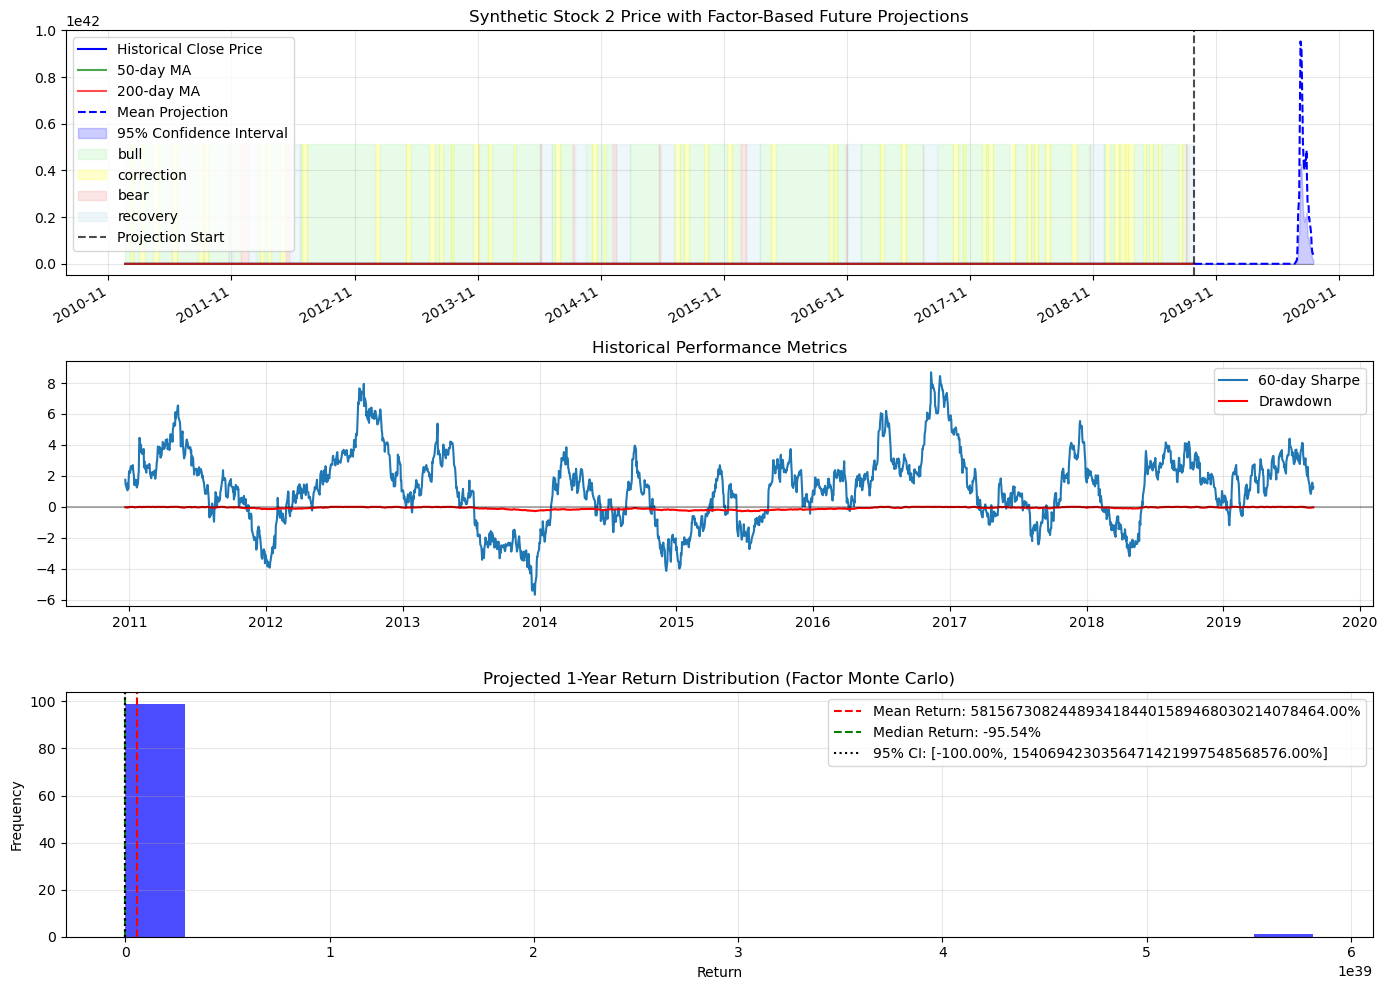

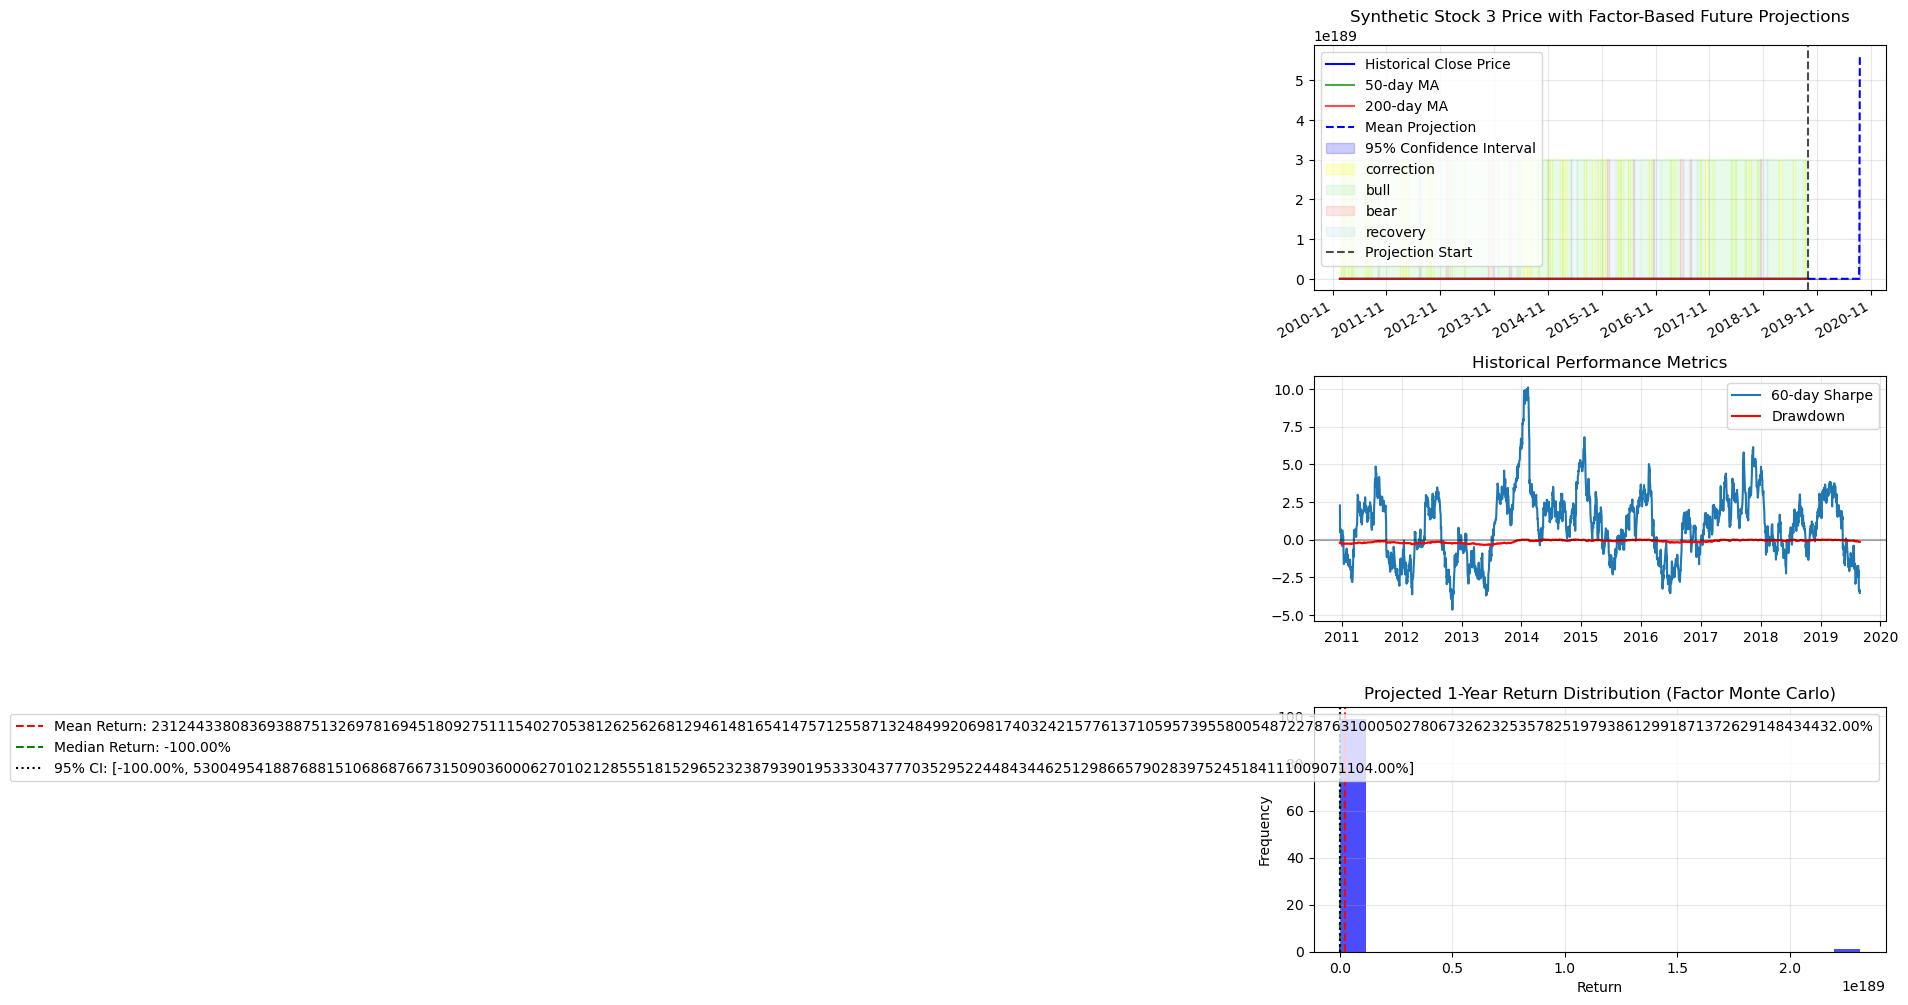

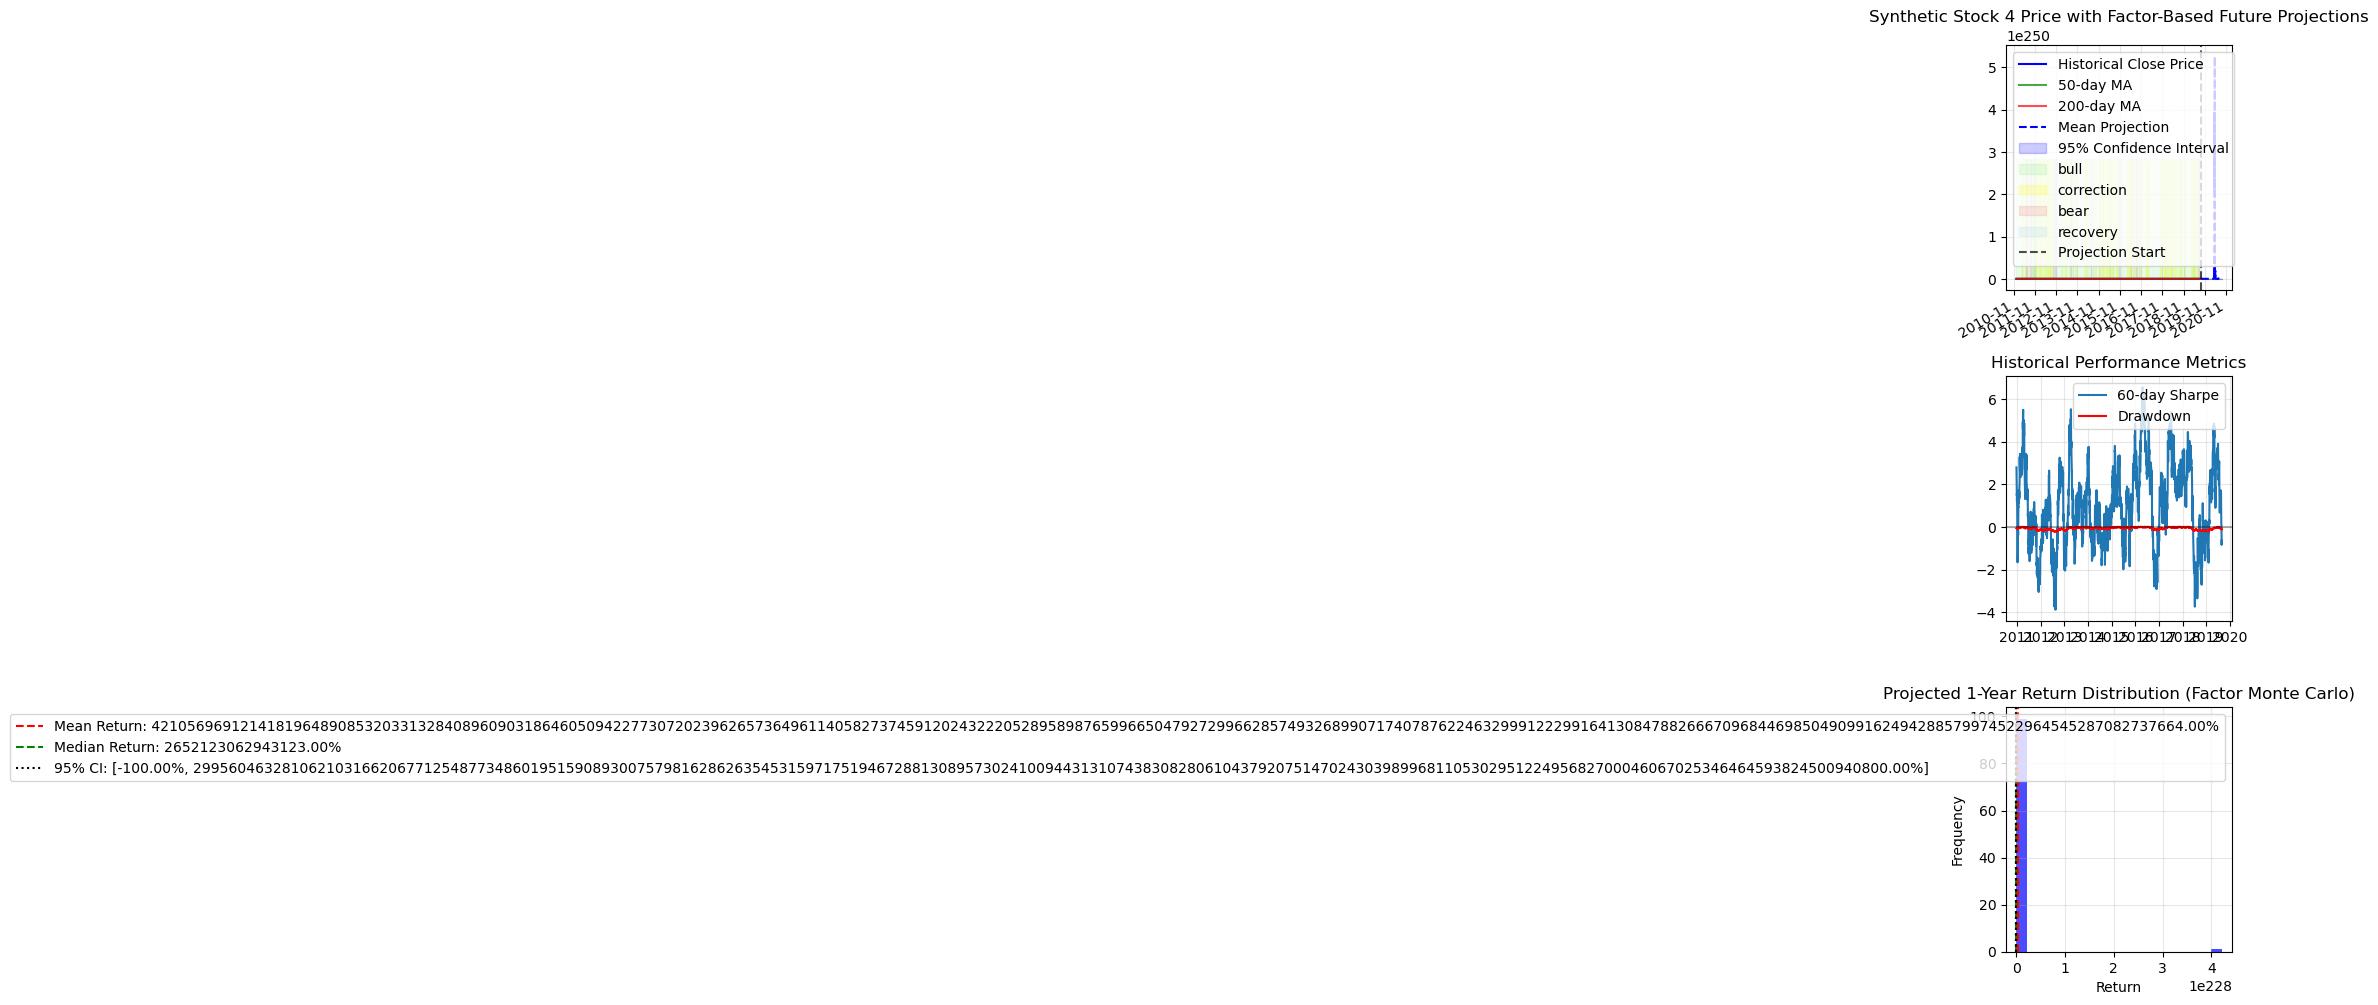

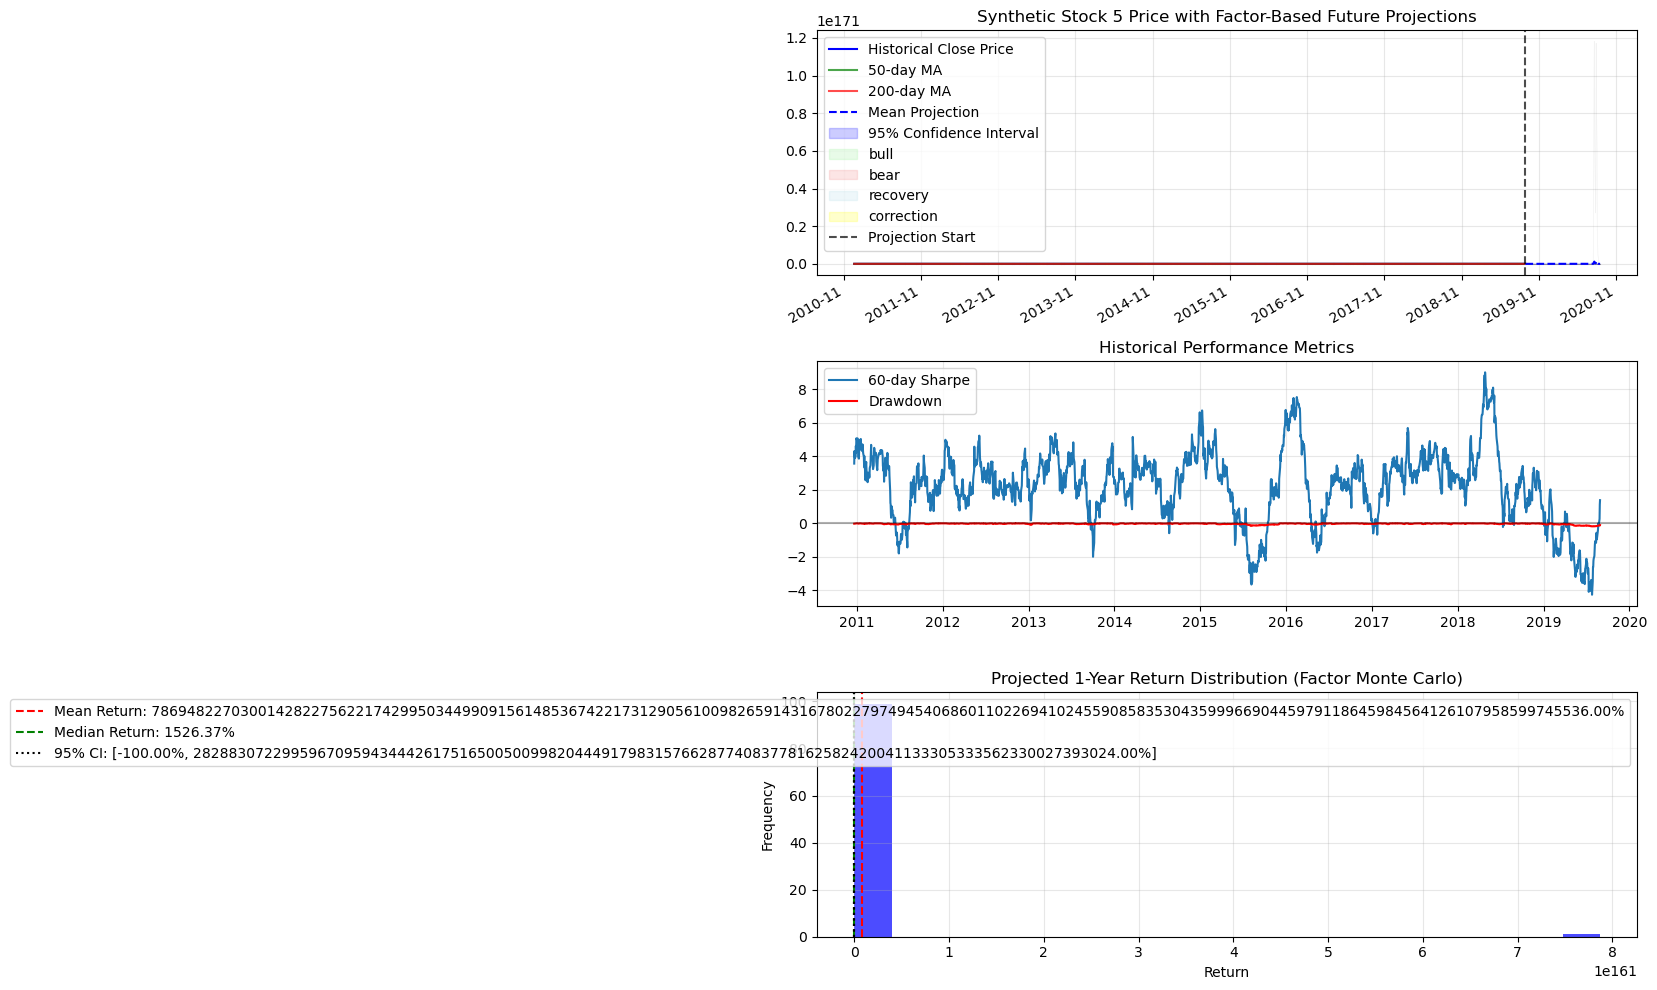

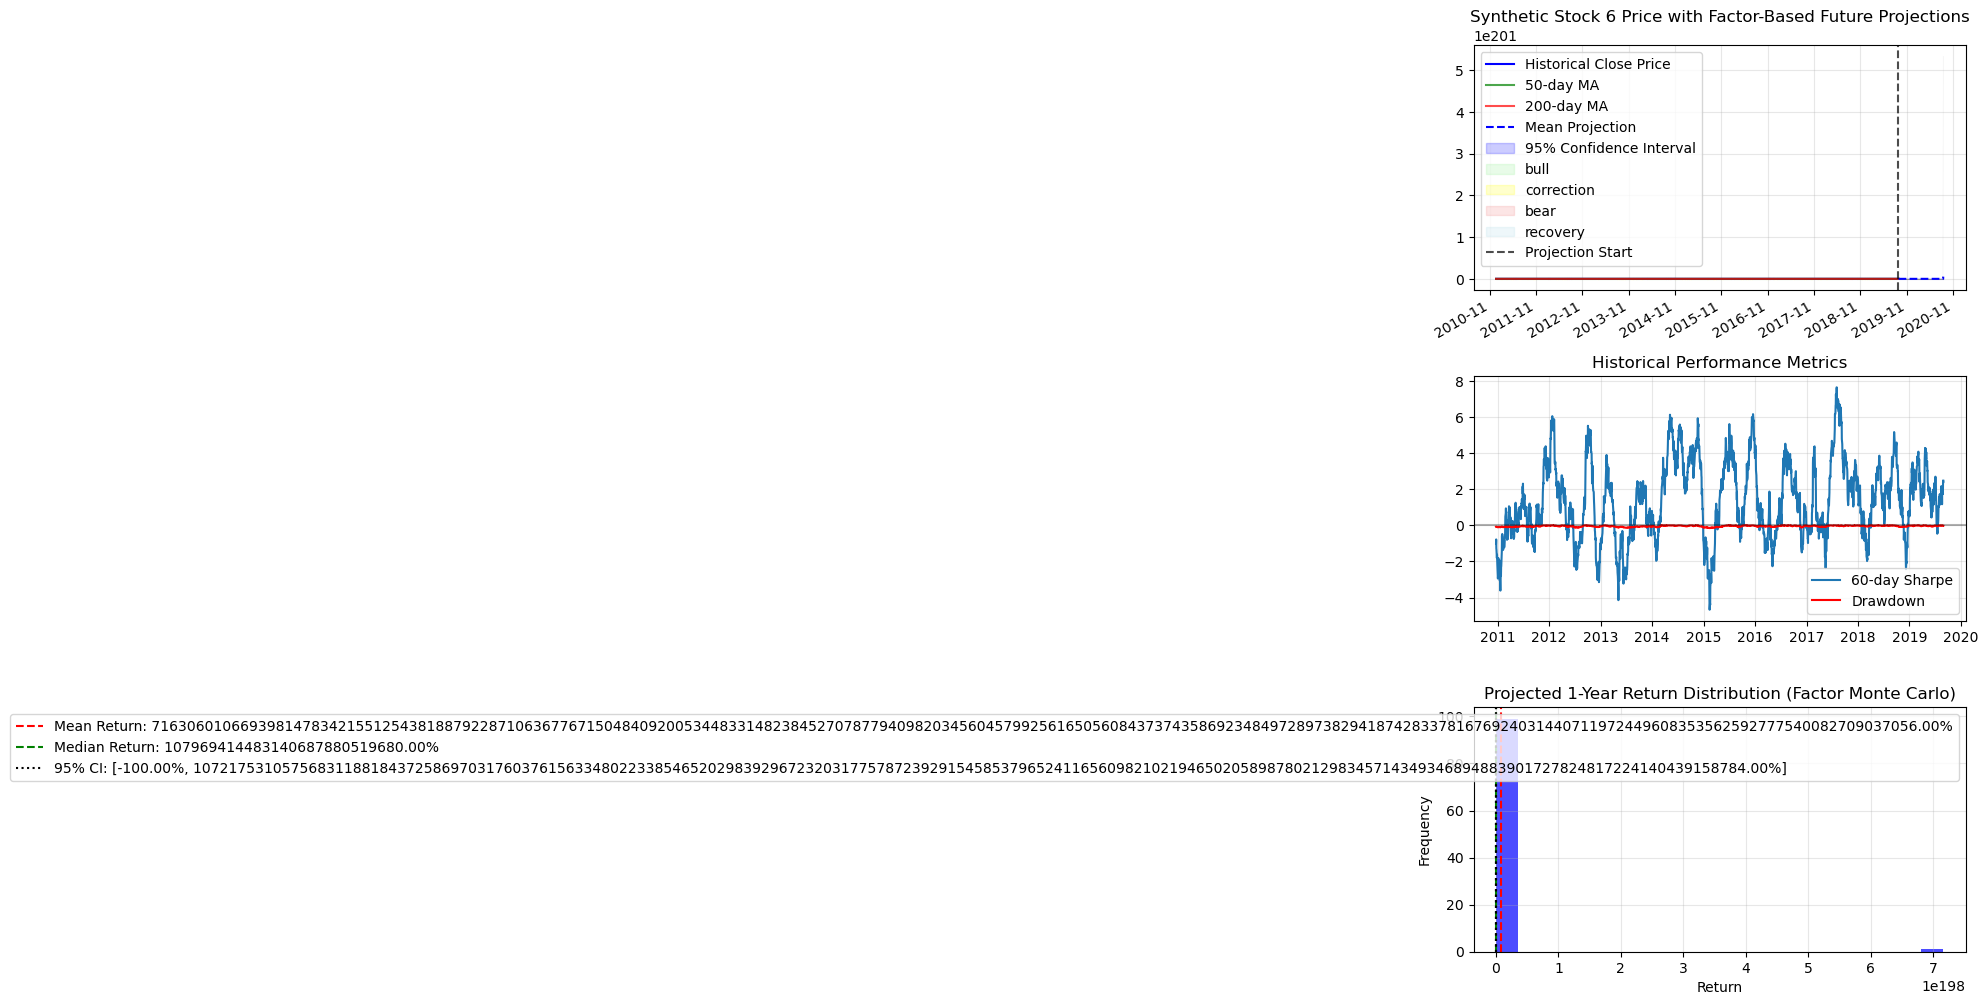

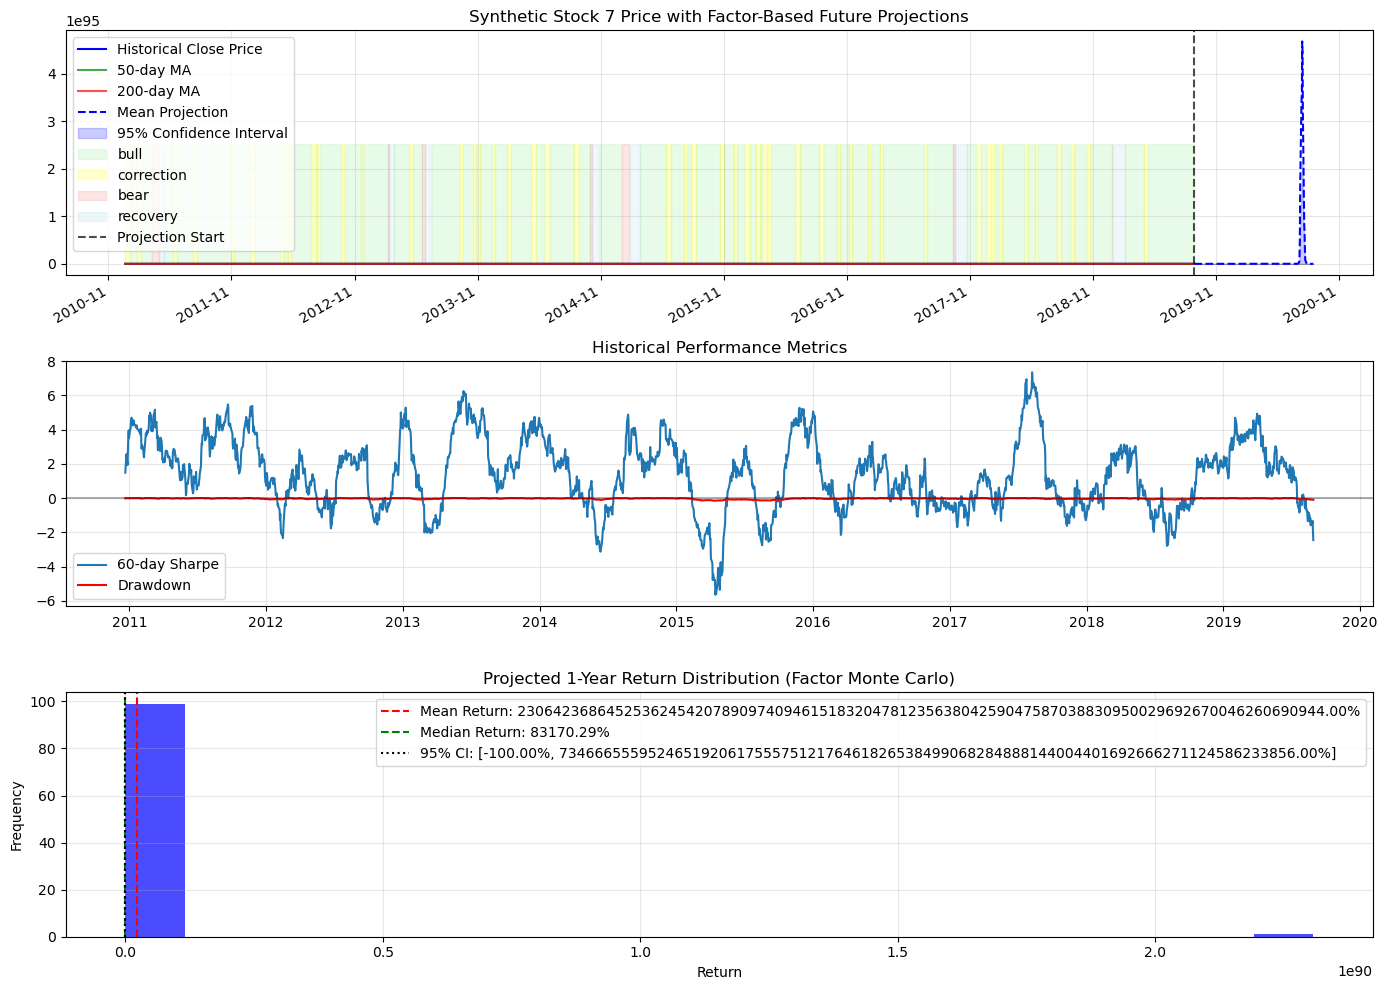

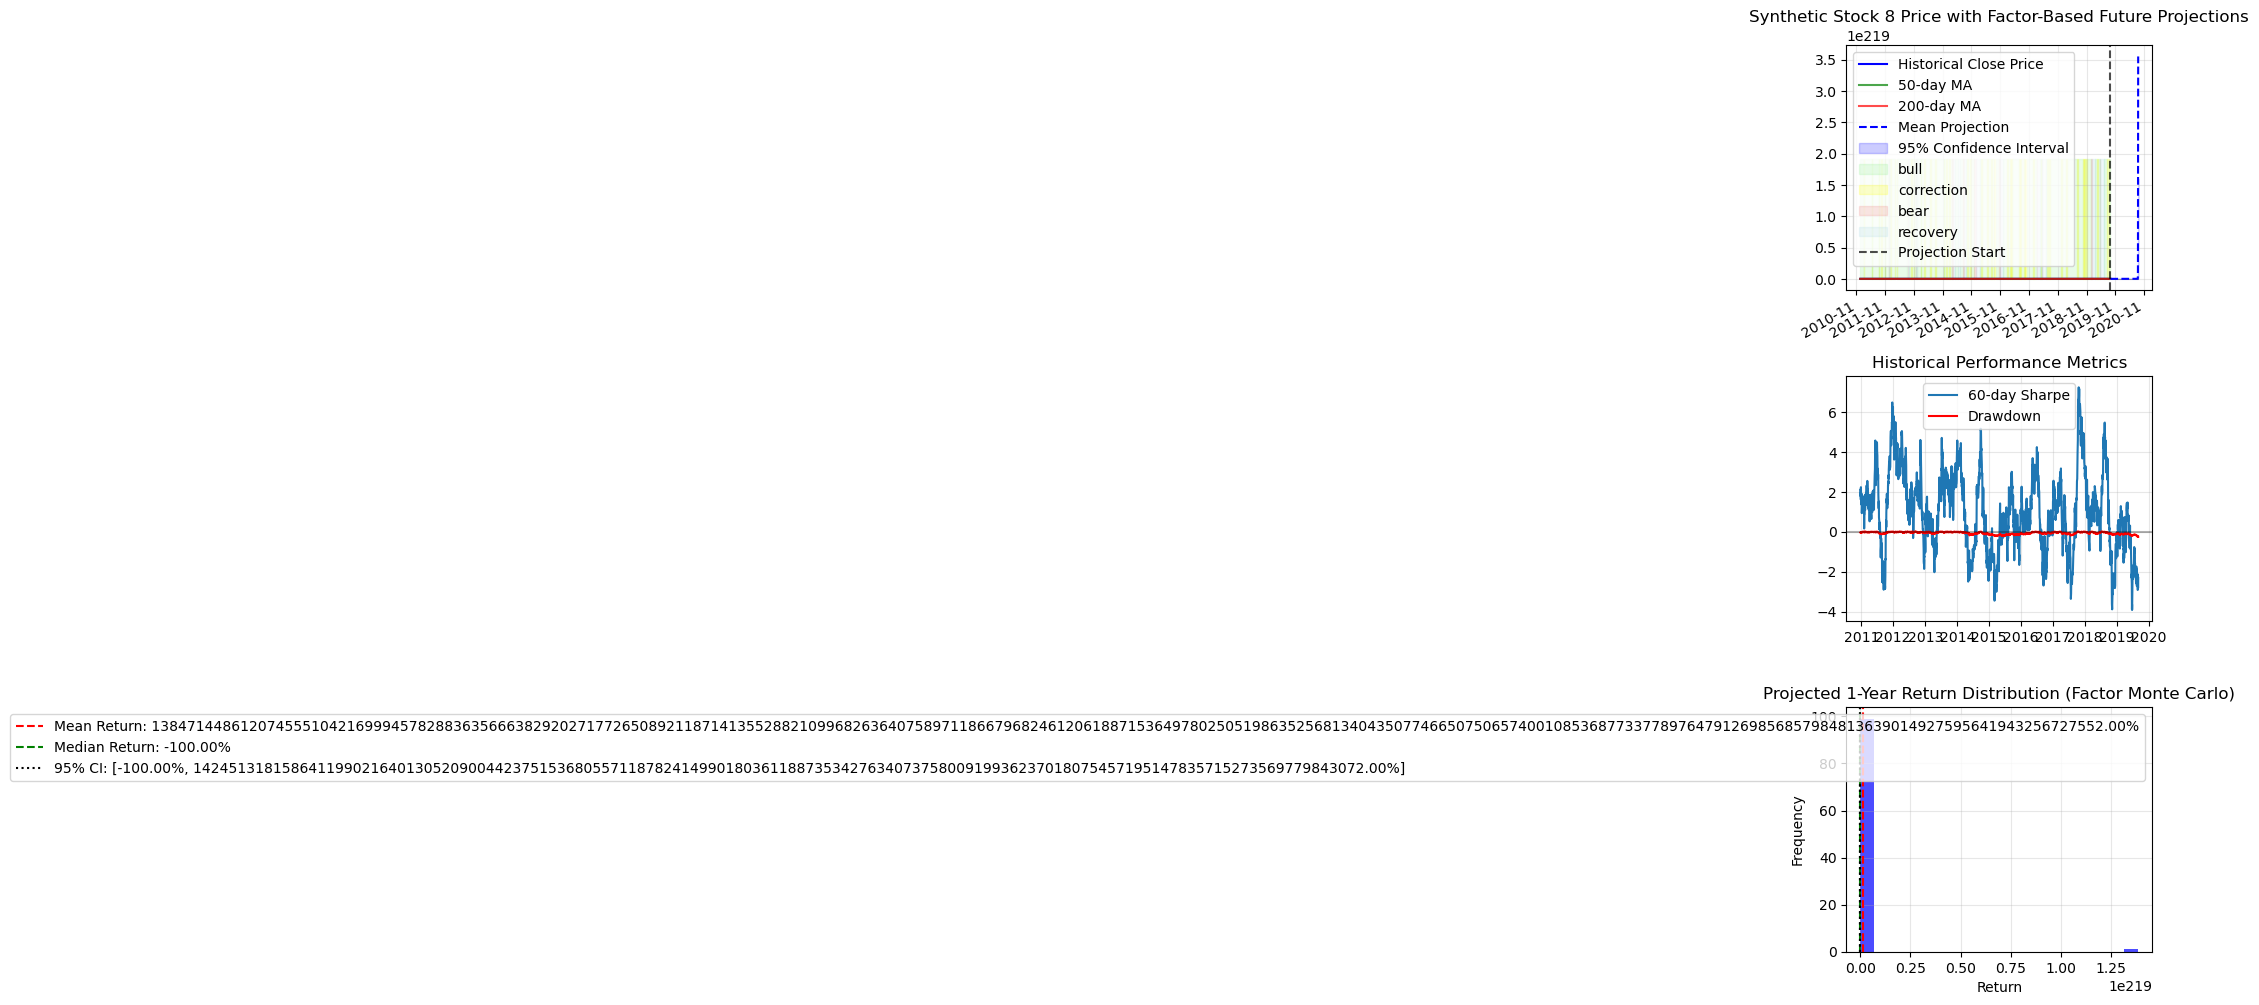

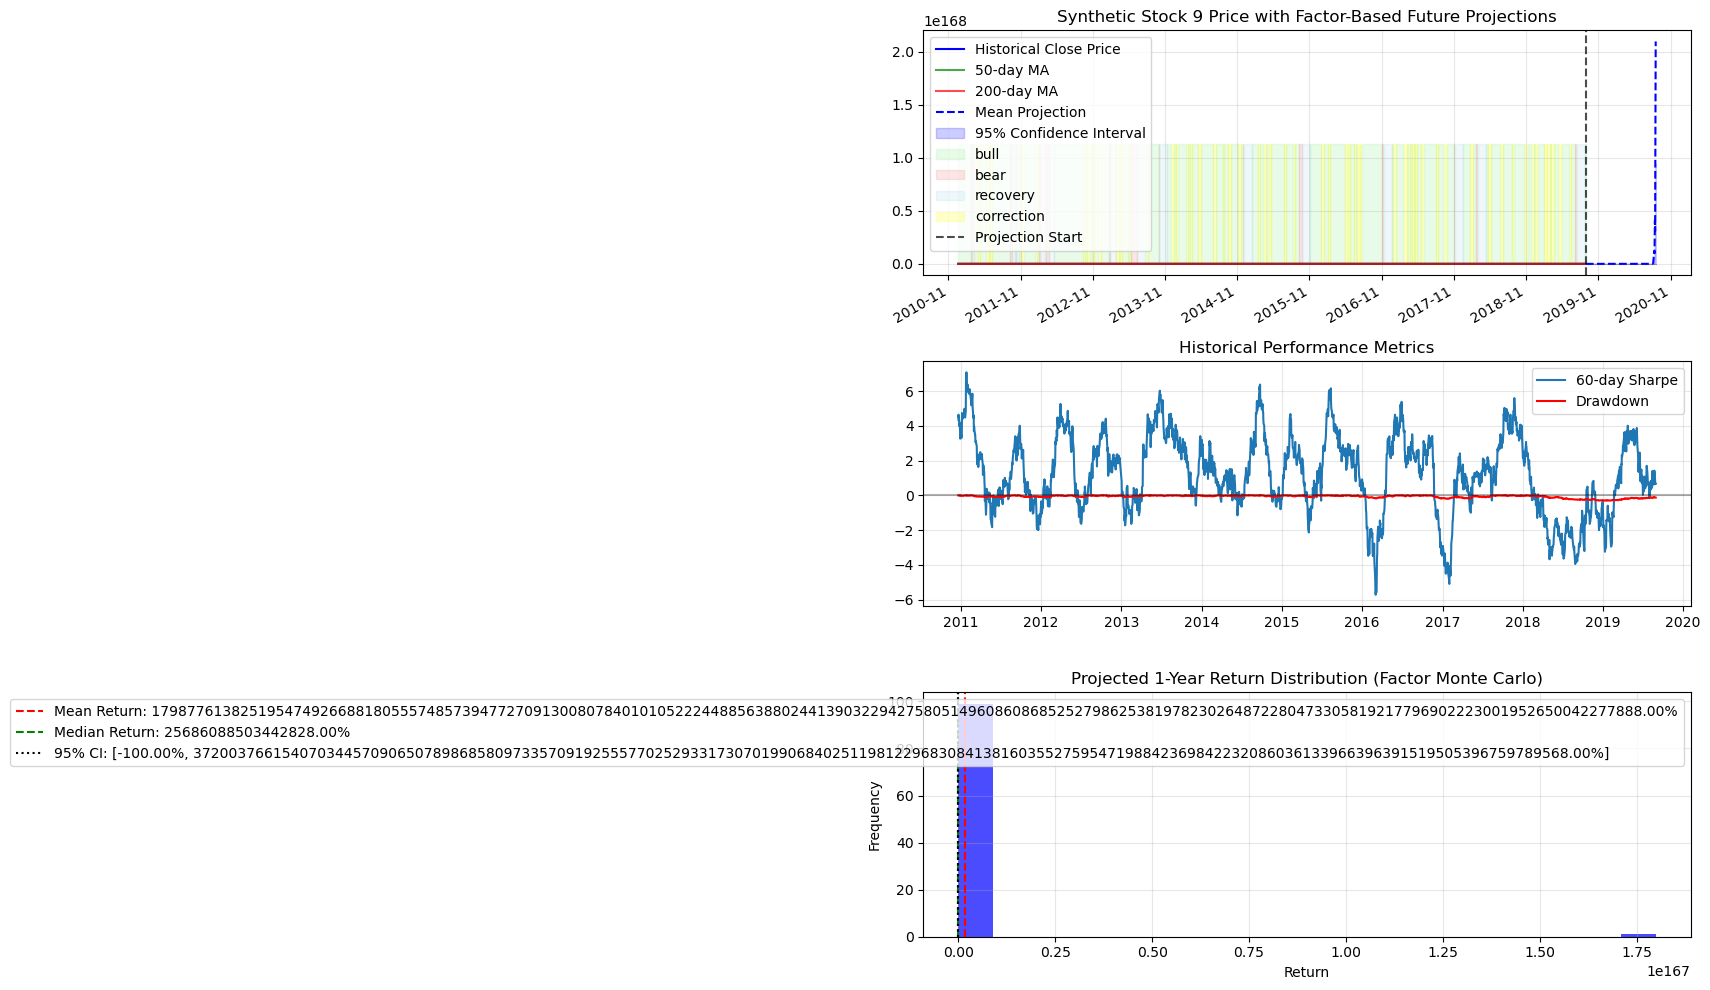

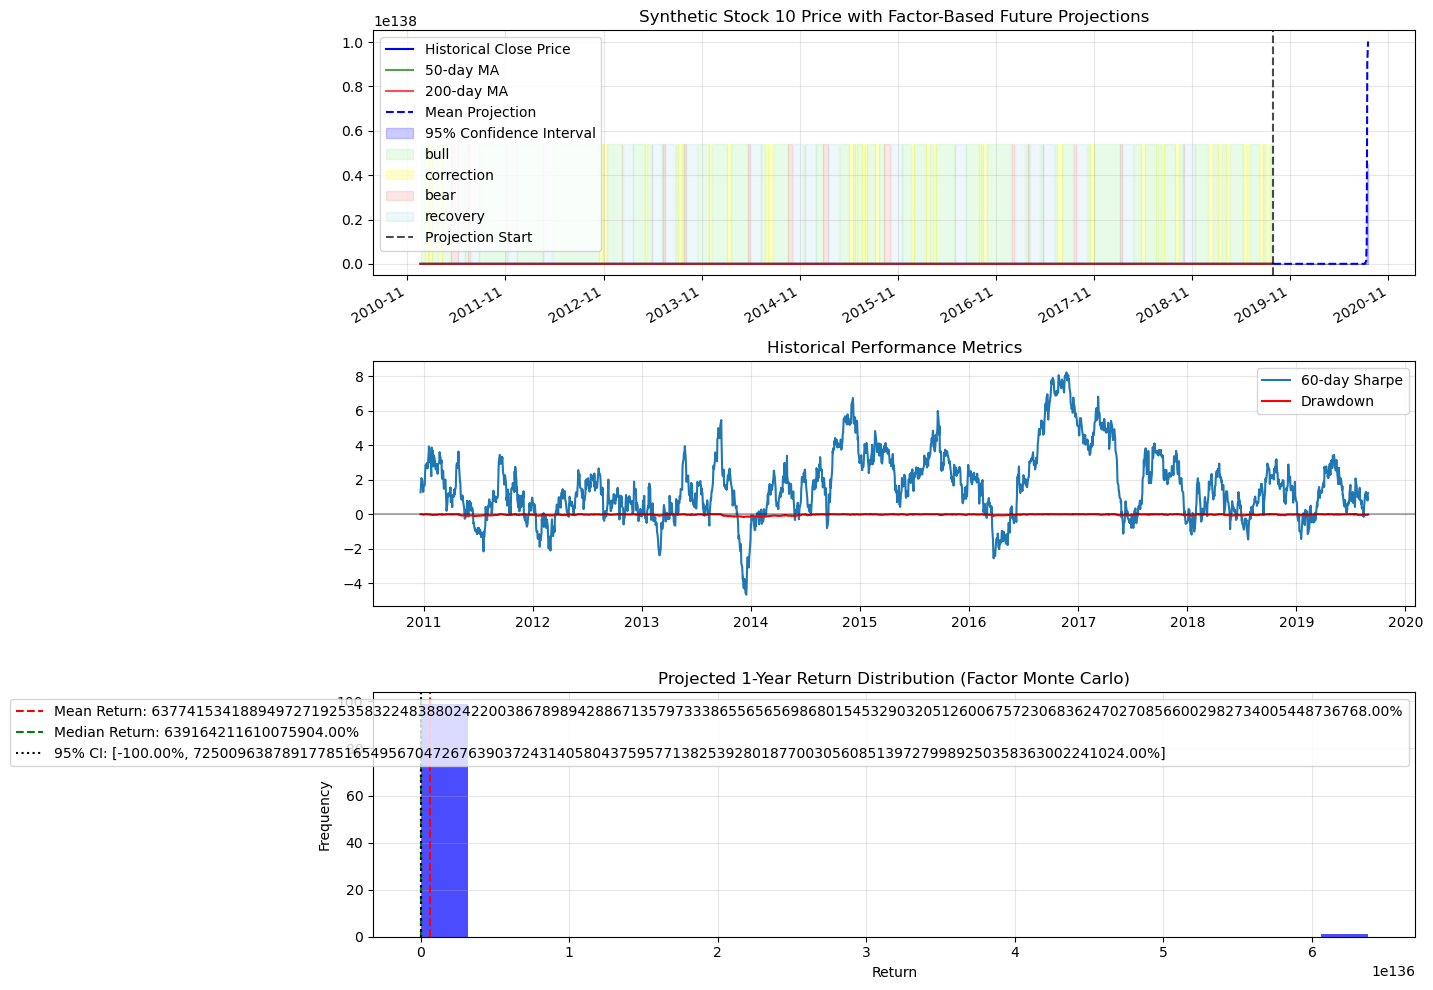

In [2]:
import numpy as np
import pandas as pd
import talib
from scipy.stats import t as student_t
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def generate_synthetic_data(n_stocks=5, 
                            synthetic_data_years=10, 
                            min_sharpe=0.4, 
                            min_annual_return=0.06, 
                            max_attempts=20, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    # Market regime constants
    BULL = "bull"
    BEAR = "bear"
    CORRECTION = "correction"
    CRASH = "crash"
    RECOVERY = "recovery"
    
    # Transition probabilities - adjusted for more realistic long-term trends
    regime_transitions = {
        'bull_to_bear': 0.008,      
        'bull_to_correction': 0.03,  
        'bear_to_bull': 0.15,       
        'correction_length': (5, 12),
        'correction_depth': (-0.10, -0.03),
    }
    
    synthetic_data_list = []
    
    while len(synthetic_data_list) < n_stocks:
        attempts = 0
        while attempts < max_attempts:
            attempts += 1
            
            # Stock-specific parameters with randomization
            bull_drift = np.random.normal(0.14, 0.03) 
            bear_drift = np.random.normal(-0.10, 0.02)
            upward_bias = np.random.normal(0.09, 0.02) 
            bull_vol = max(np.random.normal(0.15, 0.03), 0.02)
            bear_vol = max(np.random.normal(0.25, 0.03), 0.05)
            
            # Generate dates
            trading_days = synthetic_data_years * 252
            dates = pd.date_range(
                start=pd.Timestamp('2010-01-01'),
                periods=trading_days,
                freq='B'  # Business days
            )
            
            # Initialize arrays
            N = len(dates)
            close_prices = np.zeros(N)
            open_prices = np.zeros(N)
            high_prices = np.zeros(N)
            low_prices = np.zeros(N)
            regimes = np.array([BULL] * N, dtype=object)
            
            # Initial values
            initial_price = np.random.uniform(50, 150)
            close_prices[0] = initial_price
            open_prices[0] = initial_price * (1 + np.random.normal(0, 0.005))
            high_prices[0] = max(close_prices[0], open_prices[0]) * (1 + abs(np.random.normal(0, 0.01)))
            low_prices[0] = min(close_prices[0], open_prices[0]) * (1 - abs(np.random.normal(0, 0.01)))
            
            # Track regime state
            current_regime = BULL
            correction_target = None
            correction_end = None
            
            # Generate subsequent days
            for j in range(1, N):
                # Update regime
                r = np.random.random()
                
                if current_regime == BULL:
                    if r < regime_transitions['bull_to_bear']:
                        current_regime = BEAR
                    elif r < (regime_transitions['bull_to_bear'] + regime_transitions['bull_to_correction']):
                        current_regime = CORRECTION
                        dur = np.random.randint(*regime_transitions['correction_length'])
                        correction_end = j + dur
                        correction_target = np.random.uniform(*regime_transitions['correction_depth'])
                elif current_regime == BEAR:
                    if r < regime_transitions['bear_to_bull']:
                        current_regime = RECOVERY
                        bear_days = np.sum(regimes[:j] == BEAR)
                        correction_end = j + min(int(bear_days * 0.5), 30)  # Cap recovery period
                elif current_regime == CORRECTION:
                    if correction_end is not None and j >= correction_end:
                        current_regime = BULL
                        correction_target = None
                        correction_end = None
                elif current_regime == RECOVERY:
                    if correction_end is not None and j >= correction_end:
                        current_regime = BULL
                        correction_end = None
                elif current_regime == CRASH:
                    current_regime = RECOVERY
                    correction_end = j + 10  # Short recovery after crash
                    
                regimes[j] = current_regime
                
                # Set drift and volatility based on regime
                if current_regime == BULL:
                    drift = bull_drift
                    vol = bull_vol
                elif current_regime == BEAR:
                    drift = bear_drift
                    vol = bear_vol
                elif current_regime == CORRECTION:
                    drift = correction_target if correction_target is not None else np.random.uniform(*regime_transitions['correction_depth'])
                    vol = 0.5 * (bull_vol + bear_vol)
                elif current_regime == RECOVERY:
                    drift = bull_drift * 1.5
                    vol = bull_vol + 0.3 * (bear_vol - bull_vol)
                elif current_regime == CRASH:
                    drift = np.random.uniform(-0.15, -0.05)
                    vol = bear_vol * 2
                else:
                    drift = bull_drift
                    vol = bull_vol
                    
                # Convert annual to daily
                daily_drift = np.log(1 + drift) / 252
                daily_drift += upward_bias / 252
                daily_vol = vol / np.sqrt(252)
                
                # Generate returns with t-distribution for fat tails
                shock = student_t.rvs(df=8)
                shock /= np.sqrt(8 / (8 - 2))  # Normalize t-distribution
                
                daily_log_return = daily_drift + daily_vol * shock
                
                # Add flash crashes occasionally (reduced frequency)
                if np.random.random() < 0.00015 and current_regime not in [CRASH, CORRECTION]:
                    daily_log_return = np.random.uniform(-0.15, -0.05)
                    current_regime = CRASH
                
                # Update price
                close_prices[j] = close_prices[j-1] * np.exp(daily_log_return)
                
                # Generate OHLC
                daily_range = 0.03 if current_regime in [BEAR, CRASH] else 0.02
                range_factor = daily_vol / (bull_vol / np.sqrt(252))
                daily_range *= range_factor
                
                # Open price typically between previous close and current close
                open_frac = np.clip(np.random.normal(0.5, 0.2), 0, 1)
                open_prices[j] = close_prices[j-1] + (close_prices[j] - close_prices[j-1]) * open_frac
                
                # High/Low based on direction of move
                if close_prices[j] > close_prices[j-1]:
                    high_prices[j] = max(open_prices[j], close_prices[j]) * (1 + np.random.uniform(0, daily_range))
                    low_prices[j] = min(open_prices[j], close_prices[j]) * (1 - np.random.uniform(0, daily_range * 0.5))
                else:
                    high_prices[j] = max(open_prices[j], close_prices[j]) * (1 + np.random.uniform(0, daily_range * 0.5))
                    low_prices[j] = min(open_prices[j], close_prices[j]) * (1 - np.random.uniform(0, daily_range))
                
                # Make sure OHLC relationships are valid
                high_prices[j] = max(high_prices[j], open_prices[j], close_prices[j])
                low_prices[j] = min(low_prices[j], open_prices[j], close_prices[j])
            
            # Round price values for realism
            open_prices = np.round(open_prices, 2)
            high_prices = np.round(high_prices, 2)
            low_prices = np.round(low_prices, 2)
            close_prices = np.round(close_prices, 2)
            
            # Create DataFrame
            df = pd.DataFrame({
                'Date': dates,
                'Open': open_prices,
                'High': high_prices,
                'Low': low_prices,
                'Close': close_prices,
                'Regime': regimes
            })
            df.set_index('Date', inplace=True)
            
            # Calculate technical indicators using talib
            # Moving Averages
            df['MA5'] = talib.SMA(df['Close'].values, timeperiod=5)
            df['MA20'] = talib.SMA(df['Close'].values, timeperiod=20)
            df['MA50'] = talib.SMA(df['Close'].values, timeperiod=50)
            df['MA200'] = talib.SMA(df['Close'].values, timeperiod=200)
            
            # RSI
            df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)
            
            # Bollinger Bands
            upper, middle, lower = talib.BBANDS(df['Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
            df['BB_width'] = (upper - lower) / middle
            
            # ATR
            df['ATR'] = talib.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
            
            # Returns
            df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
            df['Return_1W'] = df['Close'].pct_change(5)
            df['Return_1M'] = df['Close'].pct_change(21)
            df['Return_3M'] = df['Close'].pct_change(63)
            
            # Drawdowns
            rolling_max = df['Close'].cummax()
            df['CurrentDrawdown'] = (df['Close'] / rolling_max) - 1
            
            # Max drawdown over rolling window
            df['MaxDrawdown_252d'] = df['CurrentDrawdown'].rolling(252).min()
            
            # Sharpe ratios
            df['Sharpe_20d'] = (df['LogReturn'].rolling(20).mean() / df['LogReturn'].rolling(20).std()) * np.sqrt(252)
            df['Sharpe_60d'] = (df['LogReturn'].rolling(60).mean() / df['LogReturn'].rolling(60).std()) * np.sqrt(252)
            df['Sharpe_252d'] = (df['LogReturn'].rolling(252).mean() / df['LogReturn'].rolling(252).std()) * np.sqrt(252)
            
            # Drop NaN values (from indicators that need lookback periods)
            df.dropna(inplace=True)
            
            # Check if this data meets our criteria for good US equities
            annual_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) ** (252 / len(df)) - 1
            overall_sharpe = (df['LogReturn'].mean() / df['LogReturn'].std()) * np.sqrt(252)
            
            # Check if data meets criteria
            if overall_sharpe >= min_sharpe and annual_return >= min_annual_return:
                # Add metadata about performance
                df.attrs['annualized_return'] = annual_return
                df.attrs['sharpe_ratio'] = overall_sharpe
                df.attrs['max_drawdown'] = df['CurrentDrawdown'].min()
                
                synthetic_data_list.append(df)
                print(f"Generated stock with Sharpe: {overall_sharpe:.2f}, Annual return: {annual_return:.2%}")
                break
                
            if attempts == max_attempts:
                print(f"Warning: Failed to generate a stock meeting criteria after {max_attempts} attempts. Relaxing constraints.")
                # If we've tried many times, relax the constraints
                min_sharpe *= 0.8
                min_annual_return *= 0.8
    
    return synthetic_data_list


def simulate_monte_carlo_future(df, n_simulations=100, horizon_days=252, seed=None):
    """
    Simulate future price paths using Monte Carlo simulation based on historical data.
    
    Args:
        df: Pandas DataFrame with historical price data and regimes
        n_simulations: Number of Monte Carlo paths to generate
        horizon_days: Number of days to project into the future
        seed: Random seed for reproducibility
        
    Returns:
        DataFrame with simulated future paths and dates
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Get the last date and price
    last_date = df.index[-1]
    last_price = df['Close'].iloc[-1]
    
    # Generate future dates (business days only)
    future_dates = pd.date_range(
        start=last_date + timedelta(days=1),
        periods=horizon_days,
        freq='B'
    )
    
    # Determine current market regime
    current_regime = df['Regime'].iloc[-1]
    
    # Get historical returns based on regime
    regime_returns = {}
    for regime in df['Regime'].unique():
        regime_mask = df['Regime'] == regime
        if regime_mask.sum() > 0:
            regime_returns[regime] = df.loc[regime_mask, 'LogReturn'].values
    
    # If regime has too few samples, use all returns
    min_samples = 50
    for regime in regime_returns:
        if len(regime_returns[regime]) < min_samples:
            regime_returns[regime] = df['LogReturn'].values
    
    # Calculate regime transition probabilities from historical data
    transitions = {}
    for regime in df['Regime'].unique():
        # Find transitions from this regime
        regime_indices = df.index[df['Regime'] == regime]
        if len(regime_indices) == 0:
            continue
            
        next_day_indices = [i+1 for i in df.index.get_indexer(regime_indices) if i+1 < len(df)]
        if len(next_day_indices) == 0:
            continue
            
        next_regimes = df['Regime'].iloc[next_day_indices].value_counts()
        total = next_regimes.sum()
        
        transitions[regime] = {next_regime: count/total for next_regime, count in next_regimes.items()}
    
    # Initialize array for simulated paths
    simulated_paths = np.zeros((n_simulations, horizon_days))
    simulated_regimes = np.empty((n_simulations, horizon_days), dtype=object)
    
    # Run simulations
    for sim in range(n_simulations):
        price = last_price
        regime = current_regime
        
        for day in range(horizon_days):
            # Possibly change regime based on transition probabilities
            if regime in transitions:
                r = np.random.random()
                cumulative_prob = 0
                for next_regime, prob in transitions[regime].items():
                    cumulative_prob += prob
                    if r < cumulative_prob:
                        regime = next_regime
                        break
            
            # Get returns distribution for current regime
            if regime in regime_returns and len(regime_returns[regime]) > 0:
                returns_pool = regime_returns[regime]
            else:
                # Fallback to all returns if regime data is insufficient
                returns_pool = df['LogReturn'].values
            
            # Sample a return from the appropriate distribution
            daily_return = np.random.choice(returns_pool)
            
            # Update price with the sampled return
            price *= np.exp(daily_return)
            
            # Store simulated price and regime
            simulated_paths[sim, day] = price
            simulated_regimes[sim, day] = regime
    
    # Create a DataFrame with all simulated paths
    future_df = pd.DataFrame(index=future_dates)
    
    # Add each path as a column
    path_data = {}
    for sim in range(n_simulations):
        path_data[f'path_{sim}'] = simulated_paths[sim]
    
    # Create dataframe all at once (more efficient)
    future_df = pd.DataFrame(path_data, index=future_dates)
    
    # Calculate statistics
    future_df['mean'] = future_df.mean(axis=1)
    future_df['median'] = future_df.median(axis=1)
    future_df['std'] = future_df.std(axis=1)
    future_df['95_upper'] = future_df.quantile(0.975, axis=1)
    future_df['95_lower'] = future_df.quantile(0.025, axis=1)
    
    return future_df


def simulate_factor_monte_carlo(stock_data_list, n_factors=3, n_simulations=100, horizon_days=252, seed=None):
    """
    Simulate future price paths using factor-based Monte Carlo simulation.
    
    Args:
        stock_data_list: List of DataFrames with stock price data
        n_factors: Number of factors to extract
        n_simulations: Number of Monte Carlo paths to generate
        horizon_days: Number of days to project into the future
        seed: Random seed for reproducibility
        
    Returns:
        Dictionary of DataFrames with simulated future paths for each stock
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Step 1: Extract returns from all stocks
    returns_df = pd.DataFrame()
    for i, df in enumerate(stock_data_list):
        returns_df[f'stock_{i}'] = df['LogReturn']
    
    # Get common dates across all stocks
    common_dates = returns_df.dropna().index
    returns_df = returns_df.loc[common_dates]
    
    # Step 2: Extract factors using PCA
    scaler = StandardScaler()
    returns_scaled = scaler.fit_transform(returns_df.values)
    
    pca = PCA(n_components=n_factors)
    factor_returns = pca.fit_transform(returns_scaled)
    
    # Convert to DataFrame for easier handling
    factor_df = pd.DataFrame(
        factor_returns, 
        index=returns_df.index,
        columns=[f'factor_{i}' for i in range(n_factors)]
    )
    
    # Step 3: Calculate factor loadings for each stock
    factor_loadings = pd.DataFrame(
        pca.components_.T,
        index=returns_df.columns,
        columns=[f'factor_{i}' for i in range(n_factors)]
    )
    
    # Step 4: Calculate explained variance to understand factor importance
    explained_variance = pca.explained_variance_ratio_
    print(f"Factors explain {sum(explained_variance)*100:.2f}% of variance")
    for i, var in enumerate(explained_variance):
        print(f"Factor {i+1}: {var*100:.2f}%")
    
    # Step 5: Calculate residuals (stock-specific returns)
    residuals = {}
    
    for stock in returns_df.columns:
        # Reconstruct systematic returns
        loadings = factor_loadings.loc[stock].values
        systematic_returns = factor_df.dot(loadings)
        
        # Calculate residuals
        residuals[stock] = returns_df[stock] - systematic_returns
    
    # Step 6: Generate factor paths first (these will be common across stocks)
    factor_paths = np.zeros((n_simulations, n_factors, horizon_days))
    
    # Get overall factor statistics
    factor_mean = factor_df.mean().values
    factor_cov = factor_df.cov().values
    
    # Generate correlated factor paths
    for sim in range(n_simulations):
        current_factors = factor_mean.copy()
        
        for day in range(horizon_days):
            # Add random shock based on factor covariance structure
            factor_shock = np.random.multivariate_normal(np.zeros(n_factors), factor_cov)
            current_factors = 0.95 * current_factors + factor_shock  # Add mean reversion
            factor_paths[sim, :, day] = current_factors
    
    # Step 7: For each stock, generate price paths using factor loadings and residual variance
    simulated_prices = {}
    
    for i, df in enumerate(stock_data_list):
        stock_name = f'stock_{i}'
        last_price = df['Close'].iloc[-1]
        last_date = df.index[-1]
        
        # Generate future dates
        future_dates = pd.date_range(
            start=last_date + timedelta(days=1),
            periods=horizon_days,
            freq='B'
        )
        
        # Get factor loadings for this stock
        stock_loadings = factor_loadings.loc[stock_name].values
        
        # Calculate residual volatility
        residual_std = residuals[stock_name].std()
        
        # Generate price paths
        prices = np.zeros((n_simulations, horizon_days + 1))
        prices[:, 0] = last_price
        
        for sim in range(n_simulations):
            for day in range(horizon_days):
                # Get factor returns for this day
                sim_factors = factor_paths[sim, :, day]
                
                # Calculate systematic return component using factor loadings
                systematic_return = np.dot(stock_loadings, sim_factors)
                
                # Add idiosyncratic (stock-specific) return
                idiosyncratic_return = np.random.normal(0, residual_std)
                
                # Total return is the sum of systematic and idiosyncratic components
                total_return = systematic_return + idiosyncratic_return
                
                # Update price
                prices[sim, day+1] = prices[sim, day] * np.exp(total_return)
        
        # Create DataFrame with all paths
        path_data = {}
        for sim in range(n_simulations):
            path_data[f'path_{sim}'] = prices[sim, 1:]  # Skip initial price
        
        future_df = pd.DataFrame(path_data, index=future_dates)
        
        # Calculate statistics
        future_df['mean'] = future_df.mean(axis=1)
        future_df['median'] = future_df.median(axis=1)
        future_df['std'] = future_df.std(axis=1)
        future_df['95_upper'] = future_df.quantile(0.975, axis=1)
        future_df['95_lower'] = future_df.quantile(0.025, axis=1)
        
        # Store the results
        simulated_prices[stock_name] = future_df
    
    # Step 8: Calculate correlations between simulated returns to verify
    # that factor structure is preserved
    corr_actual = returns_df.corr()
    
    # Calculate correlations in simulated returns
    sim_returns = {}
    for stock, prices in simulated_prices.items():
        # Calculate returns for the mean price path
        sim_returns[stock] = prices['mean'].pct_change().dropna()
    
    sim_returns_df = pd.DataFrame(sim_returns)
    corr_simulated = sim_returns_df.corr()
    
    print("\nCorrelation Comparison (Actual vs. Simulated):")
    for i in range(len(corr_actual.columns)):
        for j in range(i+1, len(corr_actual.columns)):
            stock1 = corr_actual.columns[i]
            stock2 = corr_actual.columns[j]
            actual = corr_actual.loc[stock1, stock2]
            simulated = corr_simulated.loc[stock1, stock2]
            print(f"{stock1}-{stock2}: Actual={actual:.3f}, Simulated={simulated:.3f}")
    
    return simulated_prices, factor_loadings, explained_variance


def test_synthetic_data_generator():
    # Generate data with fixed parameters
    data_list = generate_synthetic_data(
        n_stocks=10, 
        synthetic_data_years=10, 
    )
    
    print(f"Generated {len(data_list)} stock datasets")
    
    # Examine and plot each dataset
    for i, df in enumerate(data_list):
        print(f"\nStock {i+1}:")
        print(f"Date range: {df.index[0]} to {df.index[-1]}")
        print(f"Annualized return: {df.attrs['annualized_return']:.2%}")
        print(f"Sharpe ratio: {df.attrs['sharpe_ratio']:.2f}")
        print(f"Maximum drawdown: {df.attrs['max_drawdown']:.2%}")
        
        # Generate Monte Carlo simulations for future prices
        future_horizon_days = 252  # 1 year projection
        monte_carlo_paths = simulate_monte_carlo_future(
            df, 
            n_simulations=100, 
            horizon_days=future_horizon_days
        )
        
        # Plot price and regimes with Monte Carlo future projections
        plt.figure(figsize=(14, 10))
        
        # Price subplot with Monte Carlo projections
        plt.subplot(3, 1, 1)
        
        # Plot historical data
        plt.plot(df.index, df['Close'], label='Historical Close Price', color='blue')
        plt.plot(df.index, df['MA50'], label='50-day MA', alpha=0.7, color='green')
        plt.plot(df.index, df['MA200'], label='200-day MA', alpha=0.7, color='red')
        
        # Plot Monte Carlo future paths (first 20 for visibility)
        for j in range(20):
            plt.plot(monte_carlo_paths.index, monte_carlo_paths[f'path_{j}'], 
                    alpha=0.1, color='gray', linewidth=0.5)
        
        # Plot mean, upper and lower bounds
        plt.plot(monte_carlo_paths.index, monte_carlo_paths['mean'], 
                color='blue', linestyle='--', label='Mean Projection')
        plt.fill_between(monte_carlo_paths.index, 
                        monte_carlo_paths['95_lower'], 
                        monte_carlo_paths['95_upper'], 
                        color='blue', alpha=0.2, label='95% Confidence Interval')
        
        # Color regimes in historical data
        regimes = df['Regime'].unique()
        colors = {'bull': 'lightgreen', 'bear': 'lightcoral', 'correction': 'yellow', 
                 'crash': 'red', 'recovery': 'lightblue'}
        
        y_min, y_max = df['Close'].min() * 0.8, max(df['Close'].max(), monte_carlo_paths['95_upper'].max()) * 1.2
        for regime in regimes:
            if regime in colors:
                mask = (df['Regime'] == regime)
                if mask.any():
                    plt.fill_between(df.index, y_min, y_max, where=mask, 
                                    color=colors[regime], alpha=0.2, label=regime)
        
        # Add vertical line to indicate where projection starts
        plt.axvline(x=df.index[-1], color='black', linestyle='--', alpha=0.7, 
                   label='Projection Start')
        
        plt.title(f"Synthetic Stock {i+1} Price with Market Regimes and Future Projections")
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # Format x-axis to show dates nicely
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
        plt.gcf().autofmt_xdate()
        
        # Performance indicators subplot
        plt.subplot(3, 1, 2)
        plt.plot(df.index, df['Sharpe_60d'], label='60-day Sharpe')
        plt.plot(df.index, df['CurrentDrawdown'], label='Drawdown', color='red')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title("Historical Performance Metrics")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Monte Carlo Return Distribution
        plt.subplot(3, 1, 3)
        
        # Calculate projected returns from each path
        final_prices = np.array([monte_carlo_paths[f'path_{j}'].iloc[-1] for j in range(100)])
        returns = (final_prices / df['Close'].iloc[-1]) - 1
        
        plt.hist(returns, bins=20, alpha=0.7, color='blue')
        plt.axvline(x=np.mean(returns), color='red', linestyle='--', 
                   label=f'Mean Return: {np.mean(returns):.2%}')
        plt.axvline(x=np.median(returns), color='green', linestyle='--', 
                   label=f'Median Return: {np.median(returns):.2%}')
        
        # Add 95% confidence interval
        lower_95 = np.percentile(returns, 2.5)
        upper_95 = np.percentile(returns, 97.5)
        plt.axvline(x=lower_95, color='black', linestyle=':', 
                   label=f'95% CI: [{lower_95:.2%}, {upper_95:.2%}]')
        plt.axvline(x=upper_95, color='black', linestyle=':')
        
        plt.title(f"Projected 1-Year Return Distribution (Monte Carlo)")
        plt.xlabel("Return")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'synthetic_stock_{i+1}_regime.png')
        print(f"Regime-based plot saved to 'synthetic_stock_{i+1}_regime.png'")
    
    # Now run the factor-based Monte Carlo simulation
    print("\nRunning Factor-Based Monte Carlo Simulation...")
    simulated_prices, factor_loadings, explained_variance = simulate_factor_monte_carlo(
        data_list, 
        n_factors=3,
        n_simulations=100, 
        horizon_days=252
    )
    
    # Plot factor analysis
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    factor_loadings.T.plot(kind='bar', ax=plt.gca())
    plt.title('Factor Loadings by Stock')
    plt.xlabel('Factors')
    plt.ylabel('Loading')
    plt.grid(True, alpha=0.3)
    
    # Plot explained variance
    plt.subplot(2, 1, 2)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 
            'ro-', linewidth=2)
    plt.title('Explained Variance by Factor')
    plt.xlabel('Factor')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('factor_analysis.png')
    print("Factor analysis plot saved to 'factor_analysis.png'")
    
    # Plot factor-based Monte Carlo for each stock
    for i, df in enumerate(data_list):
        stock_name = f'stock_{i}'
        future_df = simulated_prices[stock_name]
        
        plt.figure(figsize=(14, 10))
        
        # Price subplot with Monte Carlo projections
        plt.subplot(3, 1, 1)
        
        # Plot historical data
        plt.plot(df.index, df['Close'], label='Historical Close Price', color='blue')
        plt.plot(df.index, df['MA50'], label='50-day MA', alpha=0.7, color='green')
        plt.plot(df.index, df['MA200'], label='200-day MA', alpha=0.7, color='red')
        
        # Plot Monte Carlo future paths (first 20 for visibility)
        for j in range(20):
            plt.plot(future_df.index, future_df[f'path_{j}'], 
                    alpha=0.1, color='gray', linewidth=0.5)
        
        # Plot mean, upper and lower bounds
        plt.plot(future_df.index, future_df['mean'], 
                color='blue', linestyle='--', label='Mean Projection')
        plt.fill_between(future_df.index, 
                        future_df['95_lower'], 
                        future_df['95_upper'], 
                        color='blue', alpha=0.2, label='95% Confidence Interval')
        
        # Color regimes in historical data
        regimes = df['Regime'].unique()
        colors = {'bull': 'lightgreen', 'bear': 'lightcoral', 'correction': 'yellow', 
                 'crash': 'red', 'recovery': 'lightblue'}
        
        y_min, y_max = df['Close'].min() * 0.8, max(df['Close'].max(), future_df['95_upper'].max()) * 1.2
        for regime in regimes:
            if regime in colors:
                mask = (df['Regime'] == regime)
                if mask.any():
                    plt.fill_between(df.index, y_min, y_max, where=mask, 
                                    color=colors[regime], alpha=0.2, label=regime)
        
        # Add vertical line to indicate where projection starts
        plt.axvline(x=df.index[-1], color='black', linestyle='--', alpha=0.7, 
                   label='Projection Start')
        
        plt.title(f"Synthetic Stock {i+1} Price with Factor-Based Future Projections")
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # Format x-axis to show dates nicely
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
        plt.gcf().autofmt_xdate()
        
        # Performance indicators subplot
        plt.subplot(3, 1, 2)
        plt.plot(df.index, df['Sharpe_60d'], label='60-day Sharpe')
        plt.plot(df.index, df['CurrentDrawdown'], label='Drawdown', color='red')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title("Historical Performance Metrics")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Monte Carlo Return Distribution
        plt.subplot(3, 1, 3)
        
        # Calculate projected returns from each path
        final_prices = np.array([future_df[f'path_{j}'].iloc[-1] for j in range(100)])
        returns = (final_prices / df['Close'].iloc[-1]) - 1
        
        plt.hist(returns, bins=20, alpha=0.7, color='blue')
        plt.axvline(x=np.mean(returns), color='red', linestyle='--', 
                   label=f'Mean Return: {np.mean(returns):.2%}')
        plt.axvline(x=np.median(returns), color='green', linestyle='--', 
                   label=f'Median Return: {np.median(returns):.2%}')
        
        # Add 95% confidence interval
        lower_95 = np.percentile(returns, 2.5)
        upper_95 = np.percentile(returns, 97.5)
        plt.axvline(x=lower_95, color='black', linestyle=':', 
                   label=f'95% CI: [{lower_95:.2%}, {upper_95:.2%}]')
        plt.axvline(x=upper_95, color='black', linestyle=':')
        
        plt.title(f"Projected 1-Year Return Distribution (Factor Monte Carlo)")
        plt.xlabel("Return")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'synthetic_stock_{i+1}_factor.png')
        print(f"Factor-based plot saved to 'synthetic_stock_{i+1}_factor.png'")
    
    return data_list, simulated_prices, factor_loadings, explained_variance

# Run the test
if __name__ == "__main__":
    data_list, simulated_prices, factor_loadings, explained_variance = test_synthetic_data_generator()